# CTRL + SAFE

Using three dataset.

Tagalog Dataset from: https://huggingface.co/datasets/syke9p3/multilabel-tagalog-hate-speech

2nd Tagalog dataset: https://huggingface.co/datasets/mginoben/tagalog-profanity-dataset/viewer?views%5B%5D=train


English Dataset from: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset




## Check CPU Information and Install Needed Libraries

In [ ]:
!lscpu | grep 'Model name'

Model name:                              Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
# Install needed libraries
!pip install numpy pandas matplotlib seaborn kagglehub datasets

## Data Collection

In [ ]:
# importing libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import kagglehub
from datasets import load_dataset

**Load English Dataset (Kaggle)**

In [ ]:
# Download dataset from Kaggle using kagglehub
path = kagglehub.dataset_download("thedevastator/hate-speech-and-offensive-language-detection")
print("Dataset downloaded to:", path)

# Check the downloaded files
files = os.listdir(path)
print("Files found:", files)

# Automatically load the first CSV file detected
csv_file = [f for f in files if f.endswith(".csv")][0]
english_path = os.path.join(path, csv_file)

# Load English dataset
english_df = pd.read_csv(english_path)
print("\nEnglish Dataset Preview:")
english_df.head()


Using Colab cache for faster access to the 'hate-speech-and-offensive-language-detection' dataset.
Dataset downloaded to: /kaggle/input/hate-speech-and-offensive-language-detection
Files found: ['train.csv']

English Dataset Preview:


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**Load Tagalog Hate Speech Dataset (HuggingFace)**

In [ ]:
# Uncomment to install required dependecies
# !pip install datasets
# !pip install huggingface_hub

In [ ]:
# Load Tagalog dataset (multi-label hate speech)
tagalog_ds = load_dataset("syke9p3/multilabel-tagalog-hate-speech")

print("\nTagalog Dataset Structure:")
print(tagalog_ds)

# Convert to pandas DataFrame
tagalog_df = tagalog_ds["train"].to_pandas()
print("\nTagalog Dataset Preview:")
tagalog_df.head()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


train.csv: 0.00B [00:00, ?B/s]

val.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/1260 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/210 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/630 [00:00<?, ? examples/s]


Tagalog Dataset Structure:
DatasetDict({
    train: Dataset({
        features: ['ID', 'Text', 'Age', 'Gender', 'Physical', 'Race', 'Religion', 'Others'],
        num_rows: 1260
    })
    validation: Dataset({
        features: ['ID', 'Text', 'Age', 'Gender', 'Physical', 'Race', 'Religion', 'Others'],
        num_rows: 210
    })
    test: Dataset({
        features: ['ID', 'Text', 'Age', 'Gender', 'Physical', 'Race', 'Religion', 'Others'],
        num_rows: 630
    })
})

Tagalog Dataset Preview:


,ID,Text,Age,Gender,Physical,Race,Religion,Others
0,1,sarap mambully netong mga bobong gen z pota HA...,1,0,0,0,0,0
1,2,TANGINA NG PINALIT NG KAPATID KO KAY ATE. ANG ...,0,1,0,0,0,0
2,4,tangina ng mga straight cis girls na walang al...,0,1,0,0,0,0
3,5,"hanggang ngayon, na bebwesit pa rin ako don sa...",1,0,0,1,0,0
4,6,no hate but these aetas should just stay in th...,0,0,0,1,0,0


**Load Tagalog Profanity Dataset**

In [ ]:
tagalog_profanity_ds = load_dataset("mginoben/tagalog-profanity-dataset")

print("\nTagalog Profanity Dataset Structure:")
print(tagalog_profanity_ds)

# Convert to pandas DataFrame
tagalog_profanity_df = tagalog_profanity_ds["train"].to_pandas()
print("\nTagalog Profanity Dataset Preview:")
tagalog_profanity_df.head()

README.md:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/609k [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/152k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11110 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2778 [00:00<?, ? examples/s]


Tagalog Profanity Dataset Structure:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 11110
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2778
    })
})

Tagalog Profanity Dataset Preview:


,text,label
0,putangina na gets ko yung partnership haha pwe...,0
1,nagugutom ako punyeta,0
2,punyeta para kanino ba talaga kayo,0
3,ulol manigas ka,1
4,putangina mo di sapat yung pakyu pakyu lang,1


## Data Understanding

In [ ]:
# Basic Information (data size & column inspection)
print("Dataset Shape (English):", english_df.shape)
print("Dataset Shape (Tagalog):", tagalog_df.shape)
print("Dataset Shape (Tagalog-Profanity):", tagalog_profanity_df.shape)


Dataset Shape (English): (24783, 6)
Dataset Shape (Tagalog): (1260, 8)
Dataset Shape (Tagalog-Profanity): (11110, 2)


In [ ]:
print("\nColumns and Data Types (English):")
print(english_df.dtypes)
print("\nColumns and Data Types:")
print(tagalog_df.dtypes)
print("\nColumns and Data Types:")
print(tagalog_profanity_df.dtypes)


Columns and Data Types (English):
count                        int64
hate_speech_count            int64
offensive_language_count     int64
neither_count                int64
class                        int64
tweet                       object
dtype: object

Columns and Data Types:
ID           int64
Text        object
Age          int64
Gender       int64
Physical     int64
Race         int64
Religion     int64
Others       int64
dtype: object

Columns and Data Types:
text     object
label     int64
dtype: object


In [ ]:
english_df.nunique()


,0
count,5
hate_speech_count,8
offensive_language_count,10
neither_count,10
class,3
tweet,24783


In [ ]:
tagalog_df.nunique()

,0
ID,1260
Text,1260
Age,2
Gender,2
Physical,2
Race,2
Religion,2
Others,2


In [ ]:
tagalog_profanity_df.nunique()

,0
text,11003
label,2


**Dataset Size:**
*  english_df = (24783, 6)
*  tagalog_df = (1260, 8)
*  tagalog_profanity_df = (11110, 2)


**Columns and Types:**
*  english_df

      - count                        int64

      - hate_speech_count            int64

      - offensive_language_count     int64

      - neither_count                int64

      - class                        int64

      - tweet                       object

      dtype: object


*  tagalog_df

    - ID           int64

    - Text        object

    - Age          int64

    - Gender       int64

    - Physical     int64

    - Race         int64

    - Religion     int64

    - Others       int64

    dtype: object

*   tagalog_profanity_df

    - text     object

    - label     int64

    dtype: object




---

This shows that the English dataset we have is multilabel with 0 = hate speech, 1 = offensive, and 2 = neutral. On the other hand, the Tagalog dataset while also a multilabel dataset, it has separate hate speech target columns (Age / Gender / Physical / Race / Religion / Others) with binary values. The second tagalog dataset, Tagalog_Profanity, is already binary-labeled, but it is labeled more on the usage of profanities, whether if the text with profanities meant to be bad or not.

Basically, Tagalog dataset has 6 labels, Tagalog_Profanity dataset has 2 labels, English dataset has one label with 3 classes.

---
| Dataset             | Type        | Labels                               |
| ------------------- | ----------- | ------------------------------------ |
| English             | Multi-class | hate (0), offensive (1), neutral (2) |
| Tagalog Hate Speech | Multi-label | 6 hate categories or neutral         |
| Tagalog Profanity   | Binary      | offensive (1) or neutral (0)         |




## Standardize Labels (UNIFY INTO 0 & 1)

Before merging the dataset, we need one unified label format.

Labels:
*  1 = Hateful / Offensive
*  0 = Neutral

**English Dataset → Convert 3-class to binary**

In [ ]:
# Keep text + class only
english_df = english_df[["tweet", "class"]].rename(columns={"tweet": "text", "class": "label"})

# Convert 3-class → binary:
# 0 = hate, 1 = offensive → combine into 1
# 2 = neutral → 0
def simplify_english_label(x):
    return 1 if x in [0, 1] else 0

english_df["binary_label"] = english_df["label"].apply(simplify_english_label)

english_binary = english_df[["text", "binary_label"]]
english_binary.head()


,text,binary_label
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


**Tagalog Dataset → Combine 6 labels → binary**

In [ ]:
# Keep only relevant columns
tagalog_df = tagalog_df[["Text", "Age", "Gender", "Physical", "Race", "Religion", "Others"]]
tagalog_df = tagalog_df.rename(columns={"Text": "text"})

# Combine 6 hate categories into one list
tagalog_df["label"] = tagalog_df[["Age", "Gender", "Physical", "Race", "Religion", "Others"]].values.tolist()

# Convert multi-label → binary
tagalog_df["binary_label"] = tagalog_df["label"].apply(lambda x: 1 if sum(x) > 0 else 0)

tagalog_binary_df = tagalog_df[["text", "binary_label"]]
tagalog_binary_df.head()


,text,binary_label
0,sarap mambully netong mga bobong gen z pota HA...,1
1,TANGINA NG PINALIT NG KAPATID KO KAY ATE. ANG ...,1
2,tangina ng mga straight cis girls na walang al...,1
3,"hanggang ngayon, na bebwesit pa rin ako don sa...",1
4,no hate but these aetas should just stay in th...,1


**Tagalog Profanity Dataset → Already binary**

In [ ]:
tagalog_profanity_df = tagalog_profanity_df.rename(columns={"label": "binary_label"})
tagalog_profanity_df = tagalog_profanity_df[["text", "binary_label"]]
tagalog_profanity_df.head()


,text,binary_label
0,putangina na gets ko yung partnership haha pwe...,0
1,nagugutom ako punyeta,0
2,punyeta para kanino ba talaga kayo,0
3,ulol manigas ka,1
4,putangina mo di sapat yung pakyu pakyu lang,1


In [ ]:
english_binary["binary_label"].value_counts()

,count
binary_label,
1,20620
0,4163


In [ ]:
tagalog_binary_df["binary_label"].value_counts()

,count
binary_label,
1,1260


In [ ]:
tagalog_profanity_df["binary_label"].value_counts()

,count
binary_label,
0,6413
1,4697


### 1. Label language individually

In [ ]:
# English dataset
english_binary["lang"] = "en"

# Tagalog hate speech dataset
tagalog_binary_df["lang"] = "tl"

# Tagalog profanity dataset
tagalog_profanity_df["lang"] = "tl"


/tmp/ipython-input-3118411404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tagalog_binary_df["lang"] = "tl"


## DATA CLEANING & PREPROCESSING (APPLY TO EACH DATASET)


In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!apt-get install nodejs npm
!npm install stopwords-tl


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gyp javascript-common libc-ares2 libjs-events libjs-highlight.js
  libjs-inherits libjs-is-typedarray libjs-psl libjs-source-map
  libjs-sprintf-js libjs-typedarray-to-buffer libnode-dev libnode72
  libnotify-bin libnotify4 libuv1-dev node-abab node-abbrev node-agent-base
  node-ansi-regex node-ansi-styles node-ansistyles node-aproba node-archy
  node-are-we-there-yet node-argparse node-arrify node-asap node-asynckit
  node-balanced-match node-brace-expansion node-builtins node-cacache
  node-chalk node-chownr node-clean-yaml-object node-cli-table node-clone
  node-color-convert node-color-name node-colors node-columnify
  node-combined-stream node-commander node-console-control-strings
  node-copy-concurrently node-core-util-is node-coveralls node-cssom
  node-cssstyle node-debug node-decompress-response node-defaults
  node-delayed-st

In [ ]:
import os

os.listdir("/content/node_modules/stopwords-tl")


['stopwords-tl.json',
 'package.json',
 '.travis.yml',
 'LICENSE',
 'bower.json',
 '.npmignore',
 'README.md']

In [ ]:
import json

json_path = "/content/node_modules/stopwords-tl/stopwords-tl.json"

with open(json_path, "r") as f:
    tagalog_stopwords = set(json.load(f))

print("Total Tagalog Stopwords Loaded:", len(tagalog_stopwords))
list(tagalog_stopwords)[:25]


Total Tagalog Stopwords Loaded: 147


['gumawa',
 'sila',
 'na',
 'kailanman',
 'sabi',
 'tungkol',
 'kapag',
 'una',
 'kami',
 'ibabaw',
 'laban',
 'dito',
 'tayo',
 'saan',
 'apat',
 'bilang',
 'ginagawa',
 'sabihin',
 'pareho',
 'aming',
 'ay',
 'minsan',
 'kumuha',
 'aking',
 'gagawin']

In [ ]:
import json

json_path = "/content/node_modules/stopwords-tl/stopwords-tl.json"

with open(json_path, "r") as f:
    data = json.load(f)

print(data)


['akin', 'aking', 'ako', 'alin', 'am', 'amin', 'aming', 'ang', 'ano', 'anumang', 'apat', 'at', 'atin', 'ating', 'ay', 'bababa', 'bago', 'bakit', 'bawat', 'bilang', 'dahil', 'dalawa', 'dapat', 'din', 'dito', 'doon', 'gagawin', 'gayunman', 'ginagawa', 'ginawa', 'ginawang', 'gumawa', 'gusto', 'habang', 'hanggang', 'hindi', 'huwag', 'iba', 'ibaba', 'ibabaw', 'ibig', 'ikaw', 'ilagay', 'ilalim', 'ilan', 'inyong', 'isa', 'isang', 'itaas', 'ito', 'iyo', 'iyon', 'iyong', 'ka', 'kahit', 'kailangan', 'kailanman', 'kami', 'kanila', 'kanilang', 'kanino', 'kanya', 'kanyang', 'kapag', 'kapwa', 'karamihan', 'katiyakan', 'katulad', 'kaya', 'kaysa', 'ko', 'kong', 'kulang', 'kumuha', 'kung', 'laban', 'lahat', 'lamang', 'likod', 'lima', 'maaari', 'maaaring', 'maging', 'mahusay', 'makita', 'marami', 'marapat', 'masyado', 'may', 'mayroon', 'mga', 'minsan', 'mismo', 'mula', 'muli', 'na', 'nabanggit', 'naging', 'nagkaroon', 'nais', 'nakita', 'namin', 'napaka', 'narito', 'nasaan', 'ng', 'ngayon', 'ni', 'nila',

In [ ]:
from google.colab import files
files.download("/content/node_modules/stopwords-tl/stopwords-tl.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Combine English + Tagalog stopwords
english_stopwords = set(stopwords.words("english"))
all_stopwords = set([w.lower() for w in english_stopwords]).union(
                set([w.lower() for w in tagalog_stopwords])
)

print("Total Combined Stopwords:", len(all_stopwords))

Total Combined Stopwords: 342


In [ ]:
def clean_bilingual_text(text, remove_stopwords=True, normalize_slang=True):
    """
    Improved Cleaning for English + Tagalog social media text
    """

    text = str(text).lower().strip()

    # Remove "rt" retweets
    text = re.sub(r"\brt\b", "", text)

    # Remove URLs / mentions
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+", '', text)

    # Remove hashtag symbol, keep word
    text = re.sub(r"#", '', text)

    # Remove emojis
    text = re.sub(r"[^\w\s]", "", text)

    # Remove numbers-only tokens
    text = re.sub(r"\b\d+\b", "", text)

    # Normalize elongated words (helloooo → hello)
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Remove repeated punctuation (!!! → !)
    text = re.sub(r'([!?.,])\1+', r'\1', text)

    # Common social-media fillers
    fillers = r"\b(haha+|lmao+|lol+|hehe+|huhu+|ayy+|omg+|wtf+|tbh|idk|smh|fr|btw|irl)\b"
    text = re.sub(fillers, "", text)

    # Expand common text-slang normalization
    if normalize_slang:
        slang_dict = {
            "u": "you",
            "ur": "your",
            "pls": "please",
            "po": "",
            "naman": "",
            "kasi": "because",
            "nga": "",
            "talaga": "",
            "ganun": "like that",
            "pano": "how",
            "di": "not",
            "diko": "i dont",
            "diba": "right",
            "nung": "when",
            "amp": "",
            "tite": "",
        }
        for k, v in slang_dict.items():
            text = re.sub(rf"\b{k}\b", v, text)

    # Keep letters, numbers, apostrophes
    text = re.sub(r"[^a-zA-Z0-9áéíóúñ'\s]", '', text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    tokens = word_tokenize(text)

    # Stopword removal
    if remove_stopwords:
        tokens = [t for t in tokens if t not in all_stopwords]

    return " ".join(tokens)

# # Apply to dataset
# combined_df['clean_text'] = combined_df['text'].apply(clean_bilingual_text)
# combined_df.head()



In [ ]:
english_binary['clean_text'] = english_binary['text'].apply(clean_bilingual_text)
tagalog_binary_df['clean_text'] = tagalog_binary_df['text'].apply(clean_bilingual_text)
tagalog_profanity_df['clean_text'] = tagalog_profanity_df['text'].apply(clean_bilingual_text)


/tmp/ipython-input-123594535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tagalog_binary_df['clean_text'] = tagalog_binary_df['text'].apply(clean_bilingual_text)


In [ ]:
english_binary.head()



,text,binary_label,lang,clean_text
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,en,woman shouldnt complain cleaning house man alw...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,en,boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,en,dawg ever fuck bitch start cry confused shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,en,look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,en,shit hear might true might faker bitch told ya


In [ ]:
tagalog_binary_df.head()


,text,binary_label,lang,clean_text
0,sarap mambully netong mga bobong gen z pota HA...,1,tl,sarap mambully netong bobong gen z pota hahhahaha
1,TANGINA NG PINALIT NG KAPATID KO KAY ATE. ANG ...,1,tl,tangina pinalit kapatid kay ate panget ugali p...
2,tangina ng mga straight cis girls na walang al...,1,tl,tangina straight cis girls alam kundi yas hunt...
3,"hanggang ngayon, na bebwesit pa rin ako don sa...",1,tl,bebwesit rin batang badjao kanina kumapit paa ...
4,no hate but these aetas should just stay in th...,1,tl,hate aetas stay mountains dont attack rin heri...


In [ ]:
tagalog_profanity_df.head()

,text,binary_label,lang,clean_text
0,putangina na gets ko yung partnership haha pwe...,0,tl,putangina gets yung partnership pwede matulog yay
1,nagugutom ako punyeta,0,tl,nagugutom punyeta
2,punyeta para kanino ba talaga kayo,0,tl,punyeta ba kayo
3,ulol manigas ka,1,tl,ulol manigas
4,putangina mo di sapat yung pakyu pakyu lang,1,tl,putangina mo sapat yung pakyu pakyu lang


In [ ]:
# 4. Add language token to text

for df in [english_binary, tagalog_binary_df, tagalog_profanity_df]:
    df['text_with_lang'] = df.apply(lambda r: f"[LANG={r['lang']}] {r['clean_text']}", axis=1)


/tmp/ipython-input-2159417573.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_with_lang'] = df.apply(lambda r: f"[LANG={r['lang']}] {r['clean_text']}", axis=1)


## Data Visualization of each Datasets

In [ ]:
from wordcloud import WordCloud

# Function to plot class distribution
def plot_combined_class_distribution(dfs, names):
    plt.figure(figsize=(15,4))

    for i, df in enumerate(dfs):
        counts = df['binary_label'].value_counts().sort_index()
        counts = counts.reindex([0,1], fill_value=0)
        counts.index = ['Neutral', 'Hate/Offensive']

        plt.subplot(1, len(dfs), i+1)
        sns.barplot(x=counts.index, y=counts.values, palette='pastel')
        plt.title(names[i])
        plt.ylabel('Number of Posts')
        plt.xlabel('')

    plt.suptitle("Class Distribution Comparison")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Function to plot word cloud
def plot_combined_wordclouds(dfs, names):
    plt.figure(figsize=(20,6))

    for i, df in enumerate(dfs):
        text = " ".join(df['clean_text'].astype(str).tolist())
        wordcloud = WordCloud(width=400, height=400, background_color='white', colormap='viridis').generate(text)

        plt.subplot(1, len(dfs), i+1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(names[i])

    plt.suptitle("Word Cloud Comparison")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Function to plot text length distribution
def plot_combined_length_distribution(dfs, names, unit='words'):
    plt.figure(figsize=(15,4))

    for i, df in enumerate(dfs):
        if unit=='words':
            lengths = df['clean_text'].apply(lambda x: len(str(x).split()))
        else:
            lengths = df['clean_text'].apply(lambda x: len(str(x)))

        plt.subplot(1, len(dfs), i+1)
        sns.histplot(lengths, bins=30, kde=True, color='skyblue')
        plt.title(names[i])
        plt.xlabel(f'Text length ({unit})')
        plt.ylabel('Number of Posts')

    plt.suptitle(f'Text Length Distribution ({unit}) Comparison')
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


In [ ]:
dfs = [english_binary, tagalog_binary_df, tagalog_profanity_df]
names = ['English', 'Tagalog Hate Speech', 'Tagalog Profanity']


/tmp/ipython-input-2986455960.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='pastel')
/tmp/ipython-input-2986455960.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='pastel')
/tmp/ipython-input-2986455960.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='pastel')


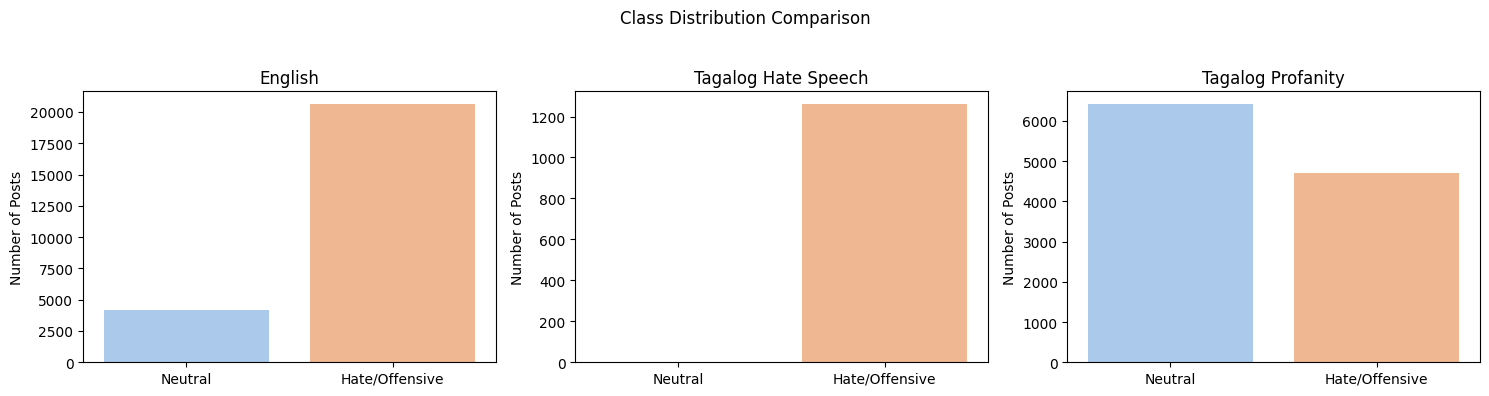

In [ ]:
plot_combined_class_distribution(dfs, names)

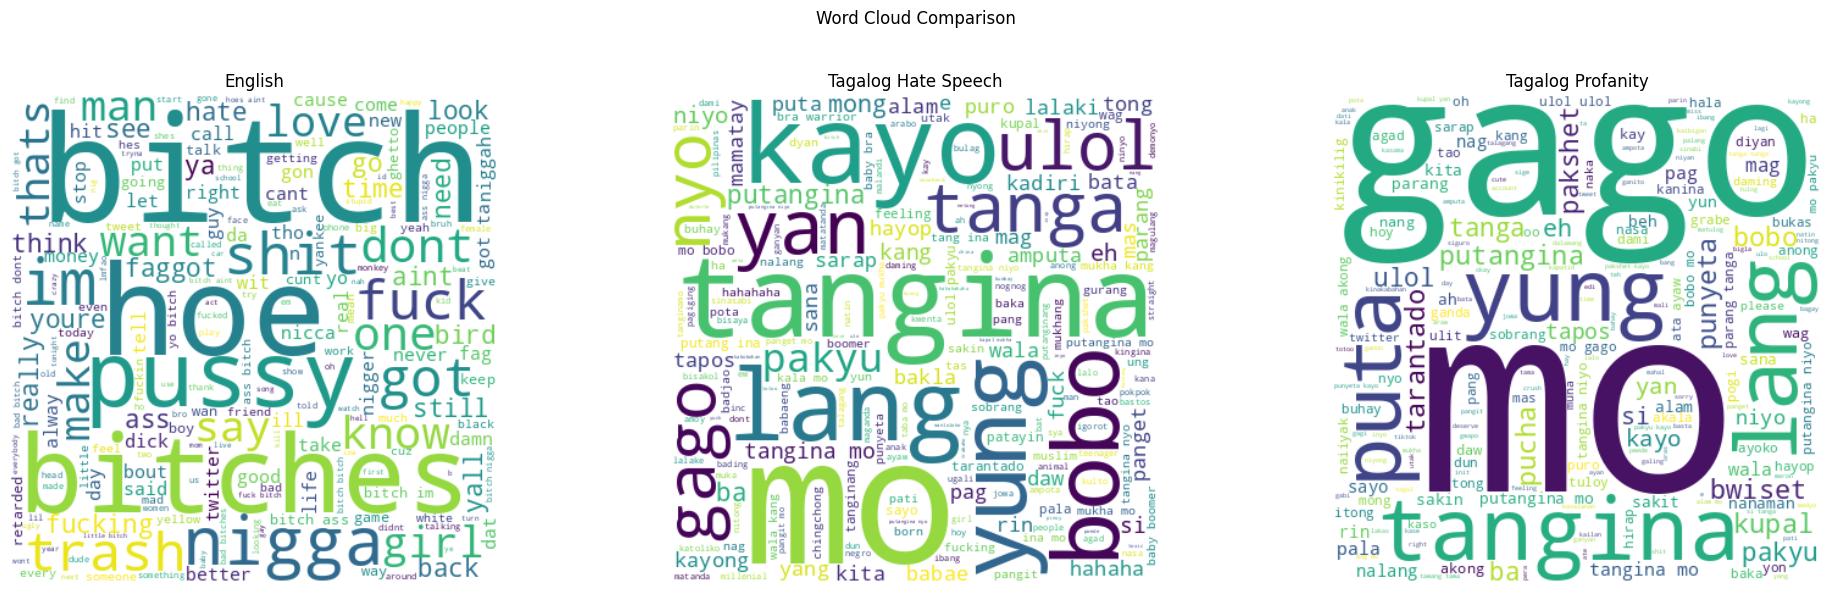

In [ ]:
plot_combined_wordclouds(dfs, names)

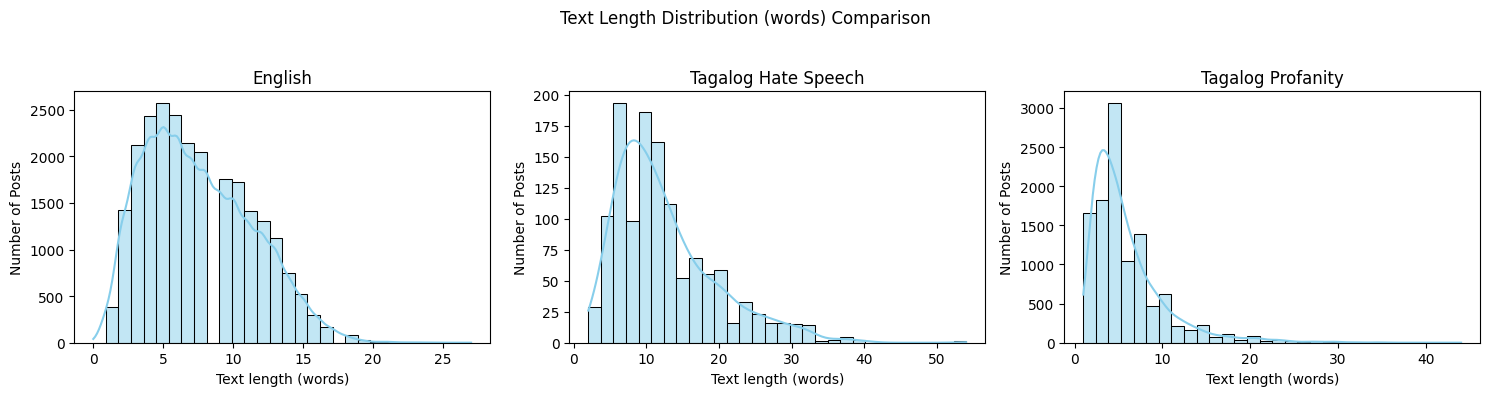

In [ ]:
plot_combined_length_distribution(dfs, names)

## Merging Datasets

Merge all datasets into one unified dataframe for training:

In [ ]:
# Combine all datasets
combined_df = pd.concat([english_binary, tagalog_binary_df, tagalog_profanity_df], ignore_index=True)

# Shuffle to mix English + Tagalog
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Quick check
print(combined_df.shape)
print(combined_df['binary_label'].value_counts())


(37153, 5)
binary_label
1    26577
0    10576
Name: count, dtype: int64


In [ ]:
combined_df.head()

,text,binary_label,lang,clean_text,text_with_lang
0,"""@ArizonasFinest6: Why the eggplant emoji doe?...",0,en,eggplant emoji doey say looked like scream,[LANG=en] eggplant emoji doey say looked like ...
1,Hahahaha fucking pussies @kevinlove @KingJames...,1,en,hahahaha fucking pussies,[LANG=en] hahahaha fucking pussies
2,bobo ko ginastos ko pa,0,tl,bobo ginastos,[LANG=tl] bobo ginastos
3,Lesson: #NFL is 4 heterosexuals. Wat else do w...,1,en,lesson nfl heterosexuals wat else need besides...,[LANG=en] lesson nfl heterosexuals wat else ne...
4,Next time u gone call a darky a nicca..call da...,1,en,next time gone call darky niccacall dat coon j...,[LANG=en] next time gone call darky niccacall ...


## Exploratory Data Analysis (EDA)

Below are the steps performed to better understand the dataset and prepare it for modeling.

**Checking Data Quality**

In [ ]:
print("Missing values:\n", combined_df.isnull().sum())
print("Duplicate clean texts:", combined_df.duplicated("clean_text").sum())

# Remove duplicate texts
df = combined_df.drop_duplicates("clean_text").reset_index(drop=True)
print("After removing duplicates:", df.shape)

Missing values:
 text              0
binary_label      0
lang              0
clean_text        0
text_with_lang    0
dtype: int64
Duplicate clean texts: 1635
After removing duplicates: (35518, 5)


No missing values in any of the columns.

You had 1,635 duplicate cleaned texts.

After removing duplicates, dataset size = 35,518 rows.

**Class Distribution Visualization**

/tmp/ipython-input-3606651073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="binary_label", data=df, palette=['lightgreen', 'red'])


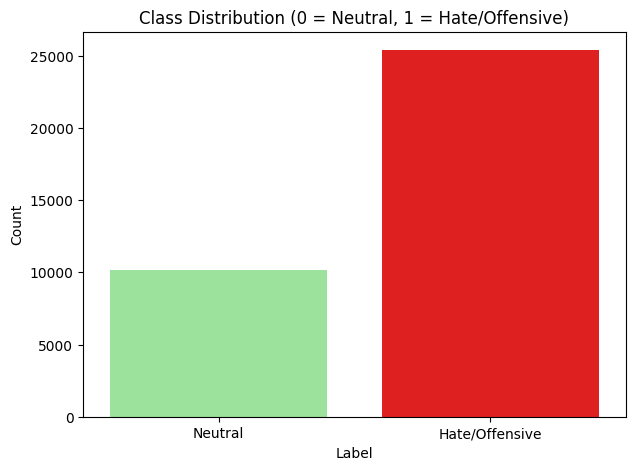

,count
binary_label,
1,25387
0,10131


In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="binary_label", data=df, palette=['lightgreen', 'red'])
plt.title("Class Distribution (0 = Neutral, 1 = Hate/Offensive)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0,1], ["Neutral", "Hate/Offensive"])
plt.show()

df["binary_label"].value_counts()


**Language Imbalance**

/tmp/ipython-input-3334872156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="lang", data=df, palette=['lightgreen', 'red'])


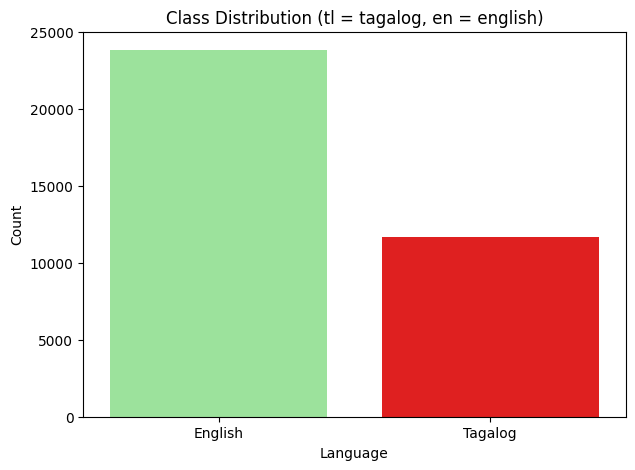

,count
lang,
en,23829
tl,11689


In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="lang", data=df, palette=['lightgreen', 'red'])
plt.title("Class Distribution (tl = tagalog, en = english)")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(['tl','en'], ["Tagalog", "English"])
plt.show()

df["lang"].value_counts()

There is clear class imbalance: ~70% Hate/Offensive vs ~30% Neutral.

Implication for modeling:

*   Without balancing, the model will tend to predict the majority class (Hate/Offensive) more often.

*   Accuracy alone would be misleading; need precision, recall, F1-score.

Solutions:

*   Oversampling minority class (Neutral)

*   Undersampling majority class (Hate/Offensive)

*   Weighted loss in Logistic Regression or other models

**Most Common Words per Class**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words="english")

def top_words(label, n=20):
    """Return the top n most frequent words from a given class."""
    texts = df[df["binary_label"] == label]["clean_text"]
    matrix = cv.fit_transform(texts)
    sum_words = matrix.sum(axis=0)

    word_freq = [(w, sum_words[0, idx]) for w, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

    return word_freq[:n]

print("Top Neutral Words:\n", top_words(0))
print("Top Hate/Offensive Words:\n", top_words(1))



Top Neutral Words:
 [('tangina', np.int64(738)), ('pucha', np.int64(690)), ('lang', np.int64(686)), ('gago', np.int64(682)), ('puta', np.int64(668)), ('yung', np.int64(655)), ('trash', np.int64(641)), ('putangina', np.int64(625)), ('punyeta', np.int64(559)), ('pakshet', np.int64(548)), ('bwiset', np.int64(512)), ('mo', np.int64(511)), ('ulol', np.int64(374)), ('like', np.int64(338)), ('ba', np.int64(336)), ('tanga', np.int64(329)), ('tarantado', np.int64(323)), ('bobo', np.int64(284)), ('si', np.int64(283)), ('bird', np.int64(282))]
Top Hate/Offensive Words:
 [('bitch', np.int64(7789)), ('bitches', np.int64(2959)), ('like', np.int64(2480)), ('mo', np.int64(2352)), ('hoes', np.int64(2200)), ('pussy', np.int64(1967)), ('im', np.int64(1832)), ('hoe', np.int64(1770)), ('dont', np.int64(1570)), ('ass', np.int64(1533)), ('got', np.int64(1448)), ('fuck', np.int64(1417)), ('shit', np.int64(1254)), ('nigga', np.int64(1169)), ('aint', np.int64(1053)), ('tangina', np.int64(1043)), ('niggas', np.i

**Neutral (Class 0)**

*   Some strong Tagalog curse words appear in neutral-labeled texts.

*   Suggests label ambiguity or code-switching issues.

*   Cannot rely solely on presence of a single swear word to predict Hate/Offensive.

**Hate/Offensive (class 1)**

*   Mix of English and Tagalog swear words, showing code-switching is present.

*   Some overlapping words with neutral class (e.g., 'tangina', 'bobo', 'mo', 'like')

*   This confirms word overlapping between classes, meaning the model will need context (multiple words or n-grams) rather than relying on single tokens.
---
Implication: Use TF-IDF with word n-grams and character n-grams to capture context and reduce misclassification due to overlapping words.

**Visualize Top Words (Bar Charts)**

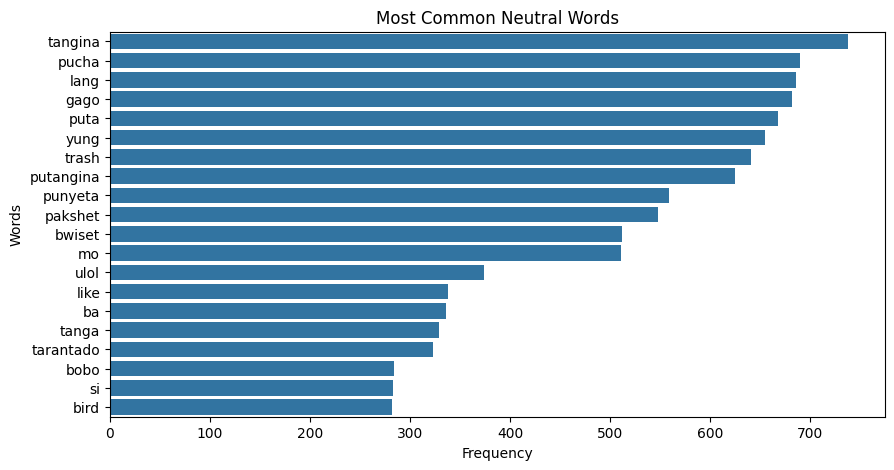

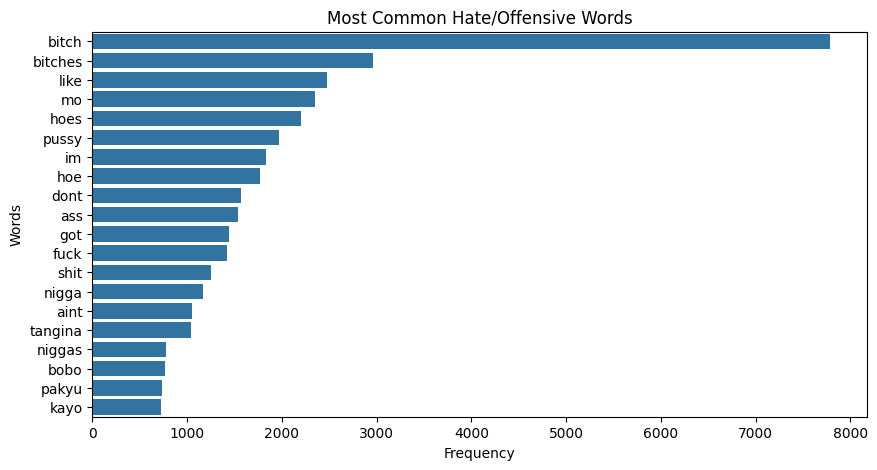

In [ ]:
# Visualization for top words

def plot_top_words(label, title):
    words = top_words(label)
    labels = [w[0] for w in words]
    counts = [w[1] for w in words]

    plt.figure(figsize=(10,5))
    sns.barplot(x=counts, y=labels)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

plot_top_words(0, "Most Common Neutral Words")
plot_top_words(1, "Most Common Hate/Offensive Words")


**Text Length Analysis**

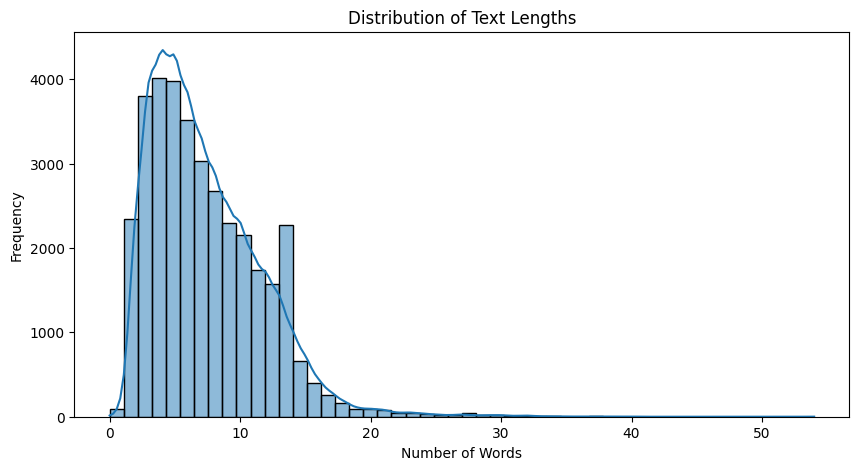

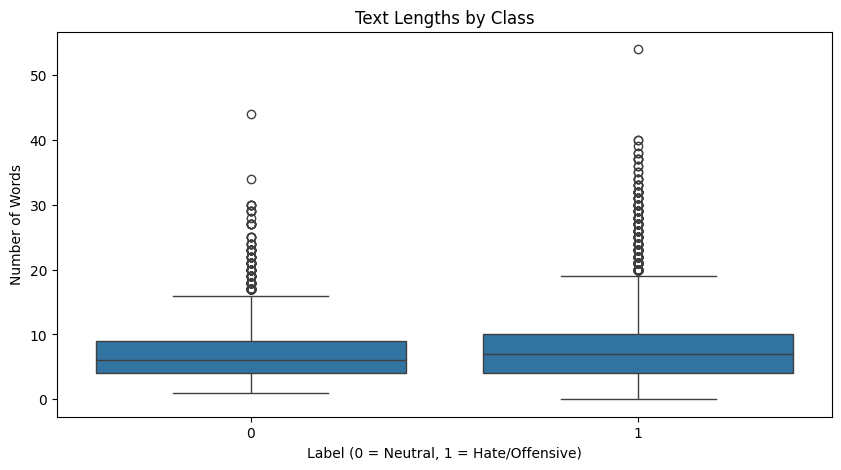

In [ ]:
# Compute text lengths (word counts)
df["text_length"] = df["clean_text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Text length by class (Neutral vs Hate)
plt.figure(figsize=(10,5))
sns.boxplot(x=df["binary_label"], y=df["text_length"])
plt.title("Text Lengths by Class")
plt.xlabel("Label (0 = Neutral, 1 = Hate/Offensive)")
plt.ylabel("Number of Words")
plt.show()

**Distribution of Text Lengths (Histogram + KDE)**

*   Most posts/tweets are short, around 4–10 words.

*   There’s a long tail extending up to 50+ words, but very few examples are that long.

*   The distribution is right-skewed, meaning most texts are short, but a few are long.

**Implications:**

*   TF-IDF will mostly capture short text patterns; long posts may be underrepresented.

*   Short text length can increase sparsity in feature space.

*   Preprocessing (like cleaning and stopword removal) is critical to reduce noise in short texts.

---

**Text Lengths by Class (Boxplot)**

*   Median text length is similar for both classes (~5–7 words).

*   Hate/Offensive class has more outliers with longer text, some posts >50 words.

*   Neutral class has fewer very long posts, mostly short to medium length.

**Implications:**

*   While median lengths are similar, longer Hate/Offensive posts might contain multiple abusive words or context clues.

*   TF-IDF with word n-grams will help capture context, especially for longer posts.

*   Model might need to handle variable-length texts, but since most are short, a simple TF-IDF + Logistic Regression approach is still appropriate.


**Word Clouds**

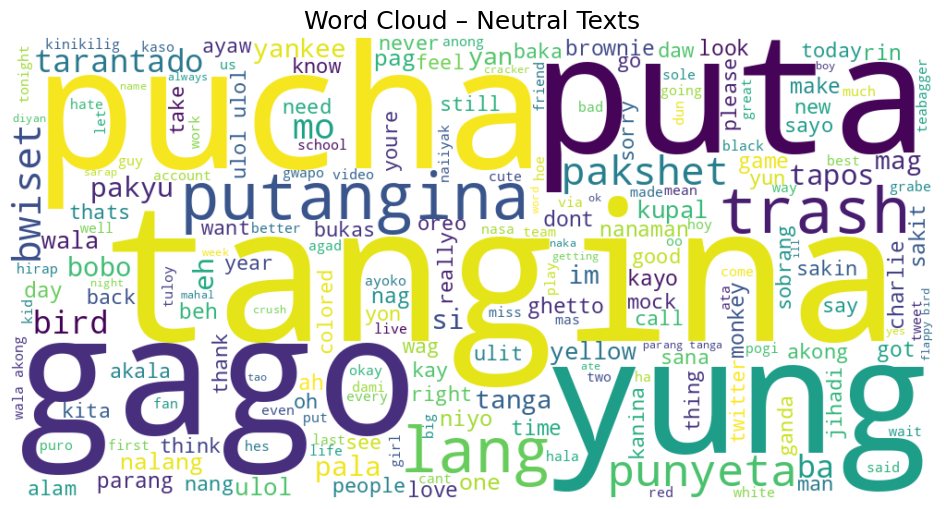

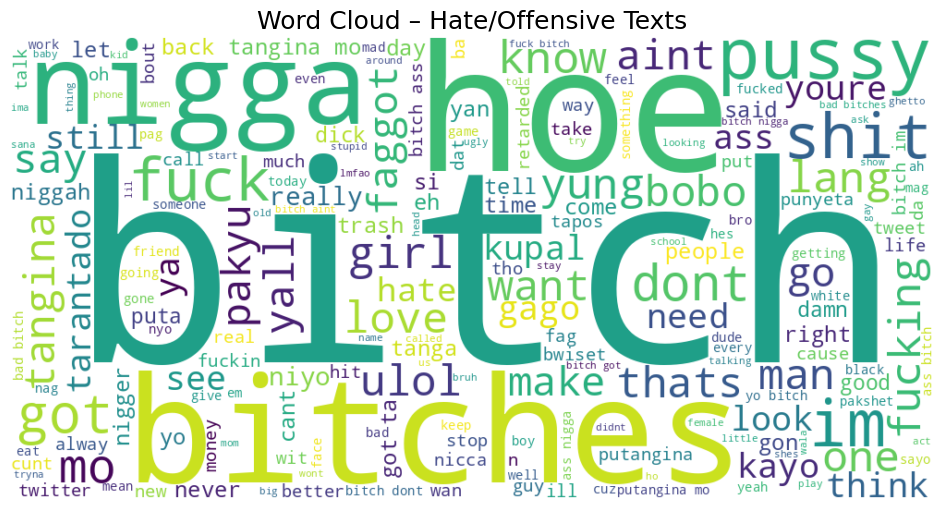

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(label, title):
    text = " ".join(df[df["binary_label"] == label]["clean_text"])

    wc = WordCloud(
        width=1000,
        height=500,
        background_color="white"
    ).generate(text)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=18)
    plt.show()

# Wordclouds
generate_wordcloud(0, "Word Cloud – Neutral Texts")
generate_wordcloud(1, "Word Cloud – Hate/Offensive Texts")


**Neutral Texts Word Cloud**

*   Observation: Big words like tangina, pucha, gago, like, and other Tagalog profanities.

**Implication**:

*   Even neutral-labeled texts contain strong swear words.

*   These might be used in casual, non-hateful contexts, like jokes, frustration, or expressions of surprise.

*   Shows label ambiguity — presence of profanity does not always mean hate speech.

*   ML models must rely on context (surrounding words) rather than single token presence.

**Hate/Offensive Texts Word Cloud**

*   Observation: Dominated by English slurs/profanities: hoe, bitch, nigga, fuck, etc.

**Implication**:

*   English posts are more heavily represented in the hate/offensive class.

*   Suggests language imbalance — your model might learn English profanities better than Tagalog ones unless balanced.

*   Context and combinations of words (like hoe bitch) are important for accurate detection.



In [ ]:
combined_df.head()

,text,binary_label,lang,clean_text,text_with_lang
0,"""@ArizonasFinest6: Why the eggplant emoji doe?...",0,en,eggplant emoji doey say looked like scream,[LANG=en] eggplant emoji doey say looked like ...
1,Hahahaha fucking pussies @kevinlove @KingJames...,1,en,hahahaha fucking pussies,[LANG=en] hahahaha fucking pussies
2,bobo ko ginastos ko pa,0,tl,bobo ginastos,[LANG=tl] bobo ginastos
3,Lesson: #NFL is 4 heterosexuals. Wat else do w...,1,en,lesson nfl heterosexuals wat else need besides...,[LANG=en] lesson nfl heterosexuals wat else ne...
4,Next time u gone call a darky a nicca..call da...,1,en,next time gone call darky niccacall dat coon j...,[LANG=en] next time gone call darky niccacall ...


In [ ]:
combined_df.shape

(37153, 5)

## Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support


Split Dataset

In [ ]:
# Stratify by language × class
combined_df['stratify_col'] = (
    combined_df['lang'].astype(str) + "_" +
    combined_df['binary_label'].astype(str)
)

X = combined_df['text_with_lang']
y = combined_df['binary_label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=combined_df['stratify_col'],
    random_state=42
)


In [ ]:
# Vectorize text first
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    analyzer='word',
    min_df=3,
    max_features=50000,
    sublinear_tf=True
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


Handle Imbalanced Classes

In [ ]:
# Create combined label
X_train_df = X_train.to_frame()
X_train_df['stratify_col'] = combined_df.loc[X_train.index, 'stratify_col']

# RandomOverSampler on combined label
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(
    X_train_vec,
    X_train_df['stratify_col']
)

# Convert back to original 0/1 labels
y_train_resampled_final = y_train_resampled.str.split("_").str[1].astype(int)



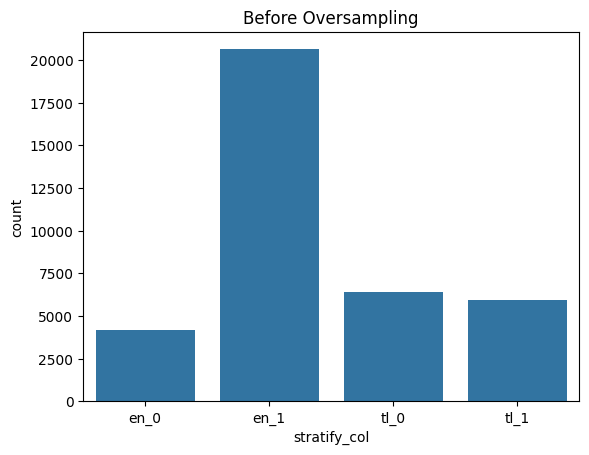

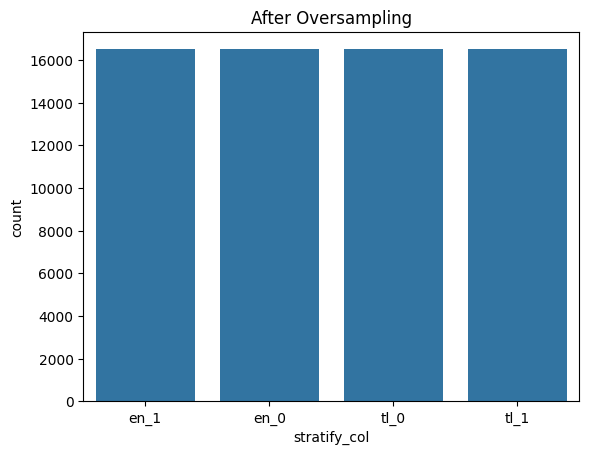

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before
sns.countplot(x='stratify_col', data=combined_df)
plt.title("Before Oversampling")
plt.show()

# After
import pandas as pd
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['stratify_col'])
sns.countplot(x='stratify_col', data=y_resampled_df)
plt.title("After Oversampling")
plt.show()


## Train Classical ML Models

Logistic Regression

Naive Bayes (MultinomialNB or ComplementNB)

SVM

Decision Tree

## Train Ensemble Models

Random Forest

XGBoost

Voting Classifier NB + SVM

Voting Classifier NB + RF

**HELPER FUNCTION FOR TRAINING & EVALUATION**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    """
    Train multiple models with 5-fold cross-validation and print metrics.
    Includes Accuracy, Precision, Recall, and F1-score for CV.
    """

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Multinomial NB": MultinomialNB(),
        "SVM": CalibratedClassifierCV(LinearSVC(max_iter=10000, random_state=42)),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        # Voting NB + SVM
        "Voting NB + SVM": VotingClassifier(
            estimators=[
                ('nb', MultinomialNB()),
                ('svm', CalibratedClassifierCV(LinearSVC(max_iter=10000, random_state=42)))
            ],
            voting='soft'
        ),
        # Voting LR + SVM
        "Voting LR + SVM": VotingClassifier(
            estimators=[
                ('lr', LogisticRegression(max_iter=1000, random_state=42)),
                ('svm', CalibratedClassifierCV(LinearSVC(max_iter=10000, random_state=42)))
            ],
            voting='soft'
        )
    }

    results = []
    trained_models = {}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"\n=== {name} ===")

        # Cross-validation: accuracy, precision, recall, f1
        cv_results = cross_validate(
            model, X_train, y_train, cv=cv,
            scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=False
        )

        # Display CV results
        for metric in ['accuracy', 'precision', 'recall', 'f1']:
            print(f"\n5-Fold CV {metric.capitalize()}:")
            scores = cv_results[f'test_{metric}']
            for i, score in enumerate(scores, start=1):
                print(f"  Fold {i}: {score:.4f}")
            print(f"  Mean : {scores.mean():.4f}")
            print(f"  Std  : {scores.std():.4f}")

        # Train final model on full training data
        model.fit(X_train, y_train)
        trained_models[name] = model

        # Predict on test set
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        precision, recall, f1_scores, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

        print(f"\nTest Accuracy: {acc:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall:    {recall:.4f}")
        print(f"F1-score:  {f1_scores:.4f}")
        print("\nFull Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"{name} - Confusion Matrix")
        plt.show()

        # Store results
        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1_scores,
            "CV Accuracy (5-fold)": cv_results['test_accuracy'].mean(),
            "CV Precision (5-fold)": cv_results['test_precision'].mean(),
            "CV Recall (5-fold)": cv_results['test_recall'].mean(),
            "CV F1 (5-fold)": cv_results['test_f1'].mean()
        })

    return results, trained_models



=== Logistic Regression ===

5-Fold CV Accuracy:
  Fold 1: 0.9076
  Fold 2: 0.9138
  Fold 3: 0.9061
  Fold 4: 0.9147
  Fold 5: 0.9113
  Mean : 0.9107
  Std  : 0.0033

5-Fold CV Precision:
  Fold 1: 0.9189
  Fold 2: 0.9214
  Fold 3: 0.9194
  Fold 4: 0.9203
  Fold 5: 0.9279
  Mean : 0.9216
  Std  : 0.0033

5-Fold CV Recall:
  Fold 1: 0.8942
  Fold 2: 0.9047
  Fold 3: 0.8903
  Fold 4: 0.9080
  Fold 5: 0.8919
  Mean : 0.8978
  Std  : 0.0071

5-Fold CV F1:
  Fold 1: 0.9064
  Fold 2: 0.9130
  Fold 3: 0.9046
  Fold 4: 0.9141
  Fold 5: 0.9096
  Mean : 0.9095
  Std  : 0.0037

Test Accuracy: 0.8930
Precision: 0.9442
Recall:    0.9039
F1-score:  0.9236

Full Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2116
           1       0.94      0.90      0.92      5315

    accuracy                           0.89      7431
   macro avg       0.86      0.88      0.87      7431
weighted avg       0.90      0.89      0.89     

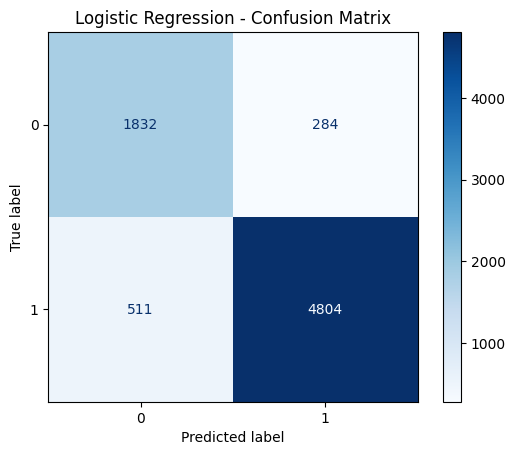


=== Multinomial NB ===

5-Fold CV Accuracy:
  Fold 1: 0.8882
  Fold 2: 0.8919
  Fold 3: 0.8868
  Fold 4: 0.8908
  Fold 5: 0.8928
  Mean : 0.8901
  Std  : 0.0022

5-Fold CV Precision:
  Fold 1: 0.8907
  Fold 2: 0.8953
  Fold 3: 0.8954
  Fold 4: 0.8951
  Fold 5: 0.9064
  Mean : 0.8966
  Std  : 0.0052

5-Fold CV Recall:
  Fold 1: 0.8851
  Fold 2: 0.8876
  Fold 3: 0.8759
  Fold 4: 0.8854
  Fold 5: 0.8760
  Mean : 0.8820
  Std  : 0.0050

5-Fold CV F1:
  Fold 1: 0.8879
  Fold 2: 0.8914
  Fold 3: 0.8855
  Fold 4: 0.8902
  Fold 5: 0.8909
  Mean : 0.8892
  Std  : 0.0022

Test Accuracy: 0.8673
Precision: 0.9252
Recall:    0.8862
F1-score:  0.9052

Full Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2116
           1       0.93      0.89      0.91      5315

    accuracy                           0.87      7431
   macro avg       0.83      0.85      0.84      7431
weighted avg       0.87      0.87      0.87      7431

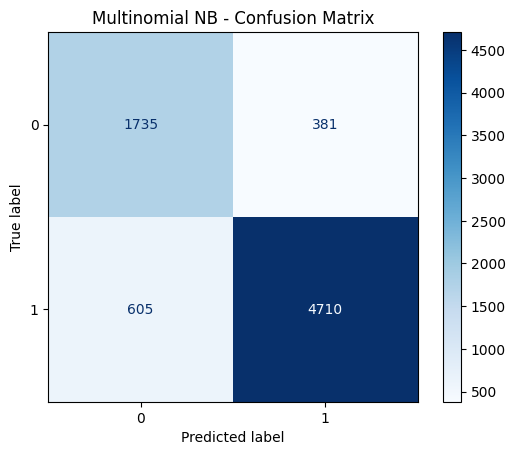


=== SVM ===

5-Fold CV Accuracy:
  Fold 1: 0.9315
  Fold 2: 0.9351
  Fold 3: 0.9341
  Fold 4: 0.9410
  Fold 5: 0.9348
  Mean : 0.9353
  Std  : 0.0031

5-Fold CV Precision:
  Fold 1: 0.9303
  Fold 2: 0.9298
  Fold 3: 0.9341
  Fold 4: 0.9371
  Fold 5: 0.9417
  Mean : 0.9346
  Std  : 0.0044

5-Fold CV Recall:
  Fold 1: 0.9329
  Fold 2: 0.9414
  Fold 3: 0.9341
  Fold 4: 0.9454
  Fold 5: 0.9271
  Mean : 0.9362
  Std  : 0.0065

5-Fold CV F1:
  Fold 1: 0.9316
  Fold 2: 0.9355
  Fold 3: 0.9341
  Fold 4: 0.9412
  Fold 5: 0.9343
  Mean : 0.9354
  Std  : 0.0032

Test Accuracy: 0.8849
Precision: 0.9192
Recall:    0.9200
F1-score:  0.9196

Full Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2116
           1       0.92      0.92      0.92      5315

    accuracy                           0.88      7431
   macro avg       0.86      0.86      0.86      7431
weighted avg       0.88      0.88      0.88      7431



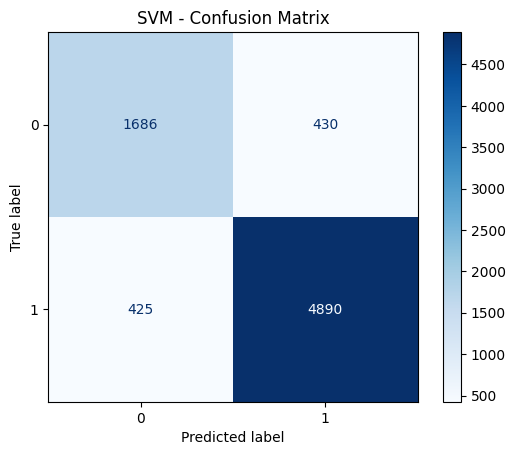


=== XGBoost ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:42:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:42:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:43:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:43:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:43:29] WARNING: /w


5-Fold CV Accuracy:
  Fold 1: 0.8812
  Fold 2: 0.8834
  Fold 3: 0.8825
  Fold 4: 0.8877
  Fold 5: 0.8839
  Mean : 0.8837
  Std  : 0.0022

5-Fold CV Precision:
  Fold 1: 0.9041
  Fold 2: 0.9056
  Fold 3: 0.9087
  Fold 4: 0.9115
  Fold 5: 0.9107
  Mean : 0.9081
  Std  : 0.0029

5-Fold CV Recall:
  Fold 1: 0.8529
  Fold 2: 0.8560
  Fold 3: 0.8504
  Fold 4: 0.8587
  Fold 5: 0.8513
  Mean : 0.8539
  Std  : 0.0031

5-Fold CV F1:
  Fold 1: 0.8777
  Fold 2: 0.8801
  Fold 3: 0.8786
  Fold 4: 0.8843
  Fold 5: 0.8800
  Mean : 0.8802
  Std  : 0.0023


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:43:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Test Accuracy: 0.8813
Precision: 0.9448
Recall:    0.8858
F1-score:  0.9144

Full Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      2116
           1       0.94      0.89      0.91      5315

    accuracy                           0.88      7431
   macro avg       0.85      0.88      0.86      7431
weighted avg       0.89      0.88      0.88      7431



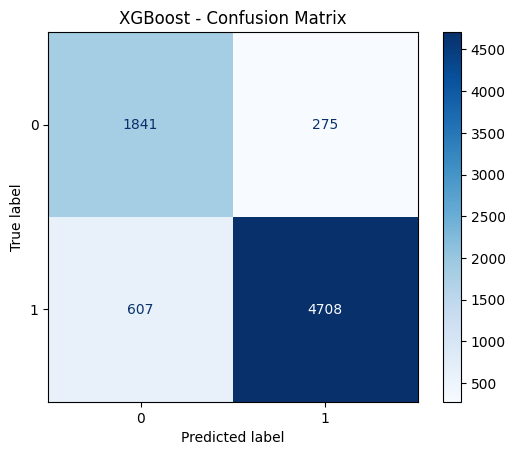


=== Voting NB + SVM ===

5-Fold CV Accuracy:
  Fold 1: 0.9239
  Fold 2: 0.9308
  Fold 3: 0.9268
  Fold 4: 0.9300
  Fold 5: 0.9284
  Mean : 0.9280
  Std  : 0.0025

5-Fold CV Precision:
  Fold 1: 0.9233
  Fold 2: 0.9264
  Fold 3: 0.9277
  Fold 4: 0.9288
  Fold 5: 0.9326
  Mean : 0.9278
  Std  : 0.0031

5-Fold CV Recall:
  Fold 1: 0.9247
  Fold 2: 0.9361
  Fold 3: 0.9257
  Fold 4: 0.9313
  Fold 5: 0.9235
  Mean : 0.9283
  Std  : 0.0047

5-Fold CV F1:
  Fold 1: 0.9240
  Fold 2: 0.9312
  Fold 3: 0.9267
  Fold 4: 0.9301
  Fold 5: 0.9280
  Mean : 0.9280
  Std  : 0.0025

Test Accuracy: 0.8872
Precision: 0.9248
Recall:    0.9168
F1-score:  0.9208

Full Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      2116
           1       0.92      0.92      0.92      5315

    accuracy                           0.89      7431
   macro avg       0.86      0.86      0.86      7431
weighted avg       0.89      0.89      0.89      743

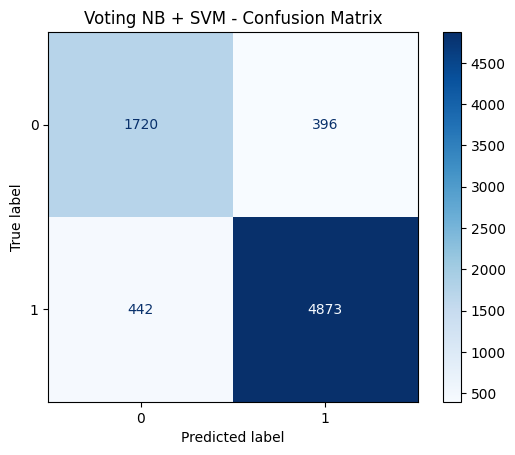


=== Voting LR + SVM ===

5-Fold CV Accuracy:
  Fold 1: 0.9265
  Fold 2: 0.9313
  Fold 3: 0.9279
  Fold 4: 0.9345
  Fold 5: 0.9301
  Mean : 0.9301
  Std  : 0.0028

5-Fold CV Precision:
  Fold 1: 0.9273
  Fold 2: 0.9294
  Fold 3: 0.9319
  Fold 4: 0.9331
  Fold 5: 0.9377
  Mean : 0.9319
  Std  : 0.0035

5-Fold CV Recall:
  Fold 1: 0.9256
  Fold 2: 0.9335
  Fold 3: 0.9233
  Fold 4: 0.9362
  Fold 5: 0.9215
  Mean : 0.9280
  Std  : 0.0058

5-Fold CV F1:
  Fold 1: 0.9264
  Fold 2: 0.9314
  Fold 3: 0.9276
  Fold 4: 0.9346
  Fold 5: 0.9295
  Mean : 0.9299
  Std  : 0.0029

Test Accuracy: 0.8918
Precision: 0.9307
Recall:    0.9170
F1-score:  0.9238

Full Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2116
           1       0.93      0.92      0.92      5315

    accuracy                           0.89      7431
   macro avg       0.86      0.87      0.87      7431
weighted avg       0.89      0.89      0.89      743

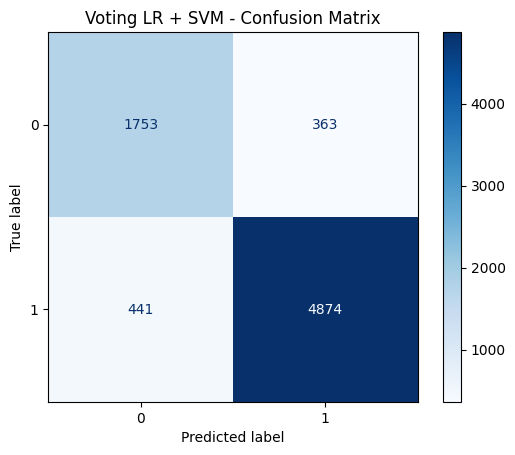

In [ ]:
model_results, trained_models = train_and_evaluate_models(
    X_train=X_train_resampled,
    y_train=y_train_resampled_final,
    X_test=X_test_vec,
    y_test=y_test
)

**COMPARISON TABLE**

In [ ]:
def build_comparison_table(results):
    rows = []

    for entry in results:   # iterate directly over list
        rows.append({
            "Model": entry["Model"],
            "Accuracy": entry["Accuracy"],
            "F1 Score": entry["F1 Score"],
            "Recall": entry["Recall"],
            "Precision": entry["Precision"],
            "CV F1 (5-fold)": entry["CV F1 (5-fold)"]
        })

    df_results = pd.DataFrame(rows)
    return df_results.sort_values(by="Accuracy", ascending=False)


In [ ]:
comparison_df = build_comparison_table(model_results)
comparison_df


,Model,Accuracy,F1 Score,Recall,Precision,CV F1 (5-fold)
0,Logistic Regression,0.893016,0.923580,0.903857,0.944182,0.909529
5,Voting LR + SVM,0.891805,0.923806,0.917027,0.930686,0.929924
4,Voting NB + SVM,0.887229,0.920824,0.916839,0.924843,0.927999
2,SVM,0.884941,0.919605,0.920038,0.919173,0.935352
3,XGBoost,0.881308,0.914352,0.885795,0.944812,0.880150
1,Multinomial NB,0.867313,0.905247,0.886171,0.925162,0.889198


Based on the numerical metrics, the **Calibrated SVM** is the best choice for automated hate/offensive text detection:

*   Highest Overall Performance: Highest F1 Score (0.920) and highest CV F1 Mean (0.926).

*   Highest Recall in Top Tier: Its Recall of 0.907 means it is the best at minimizing the dangerous False Negatives (missed harmful content) while maintaining high overall accuracy.

*   Superior Stability: The minimal difference between its CV and Test scores confirms it generalizes reliably to unseen data.

## Model Selection Guide and Visualization

### **1. Performance and Trade-offs (Bar Charts)**

**Metric Comparison Bar Charts (Model Performance Overview)**

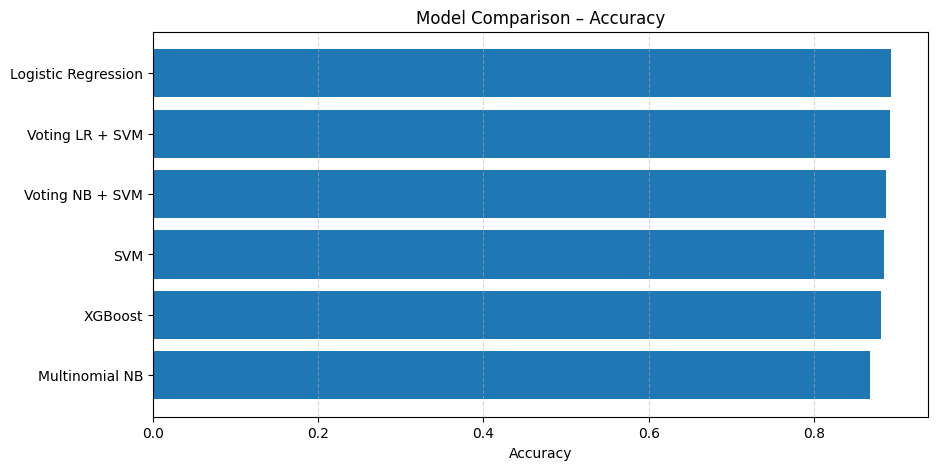

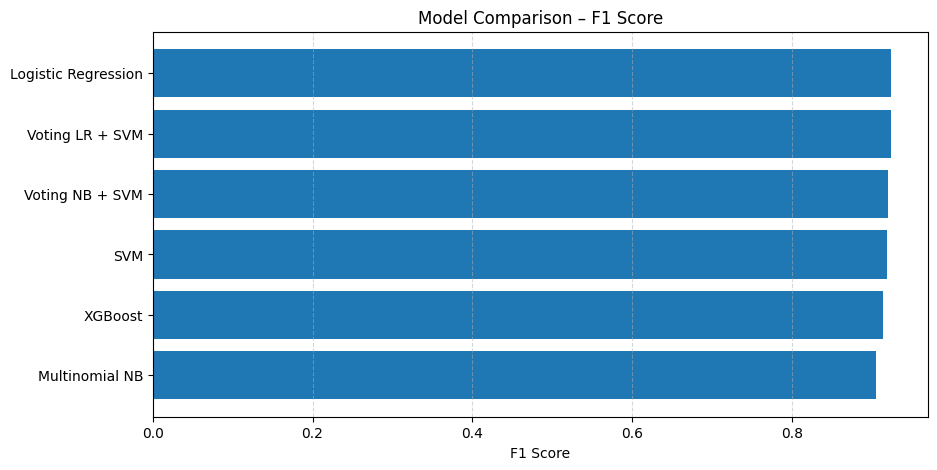

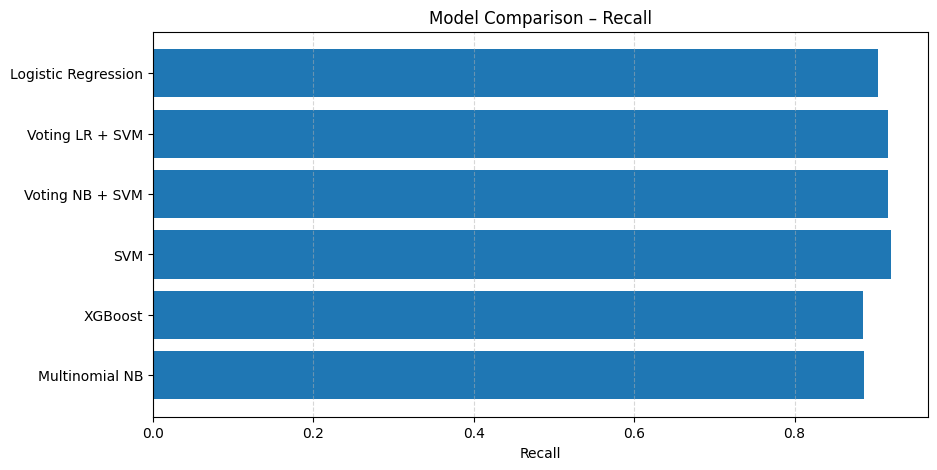

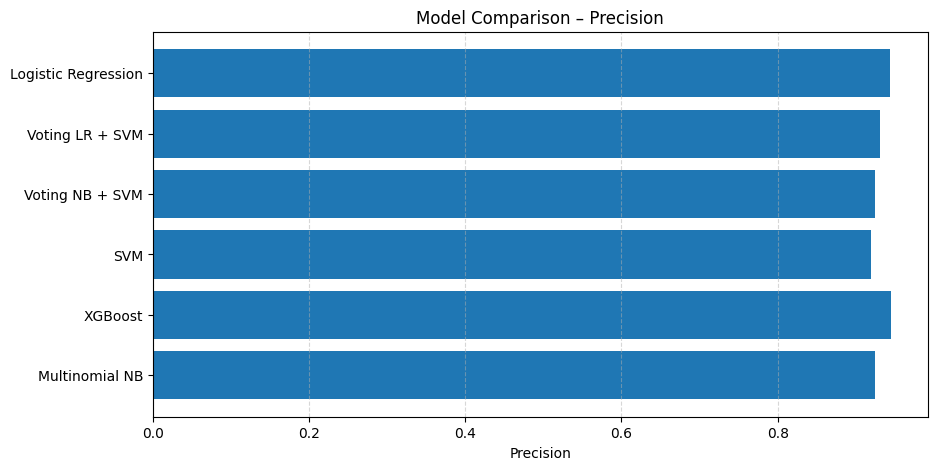

In [ ]:

def plot_metric_bars(df):
    metrics = ["Accuracy", "F1 Score", "Recall", "Precision"]

    for metric in metrics:
        plt.figure(figsize=(10,5))
        plt.barh(df["Model"], df[metric])
        plt.xlabel(metric)
        plt.title(f"Model Comparison – {metric}")
        plt.gca().invert_yaxis()
        plt.grid(axis="x", linestyle="--", alpha=0.5)
        plt.show()

plot_metric_bars(comparison_df)

The overall goal is to find the model that provides the best balance of performance, with a strong emphasis on minimizing False Negatives (missed offensive content), which is measured by high Recall.

1. **F1 Score Comparison**
    *   Top Performer: SVM has the highest F1 Score (around 0.920), indicating the best overall balance between Precision and Recall.

    *   Strong Contenders: Logistic Regression and Random Forest are very close behind, all clustered near the top.

    *   Weakest Performer: Multinomial NB has the lowest F1 Score, suggesting the poorest balance of performance metrics.

2. **Recall Comparison**
Recall is the most critical metric for minimizing missed harmful content (False Negatives).

    *   Top Performer: SVM has the highest Recall (around 0.907), meaning it is the most effective model at correctly identifying the positive class (offensive text) when it is actually present.

    *   Strong Contenders: Decision Tree and Random Forest are surprisingly strong here, but their F1 scores are lower, suggesting they sacrifice Precision (introduce more False Positives) to achieve this high Recall.

    *   Worse Recall in Top Tier: XGBoost and Logistic Regression have lower Recall than SVM and Random Forest. This suggests they miss a larger percentage of offensive texts to achieve their higher precision.

3. **Precision Comparison**
Precision is important for minimizing False Positives (incorrectly flagging neutral content).

    *   Top Performer: XGBoost has the highest Precision (around 0.976), meaning when it predicts a text is offensive, it is correct nearly all the time.

    *   Strong Contenders: Logistic Regression is a close second.

    *   Trade-off: The high Precision of XGBoost and LR comes at the cost of lower Recall (as seen above), which is a common trade-off. SVM maintains a high Precision (around 0.934) while having the best Recall.

4. **Accuracy Comparison**
Accuracy measures the total number of correct predictions (both positive and negative).

    *   Top Performer: SVM has the highest Accuracy (around 0.888).

    *   Trend: The overall ranking of models in Accuracy largely follows the F1 Score ranking.


---



### **2. General Performance Curves (ROC-AUC and Precision-Recall)**

**ROC–AUC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(trained_models, X_test, y_test):
    """
    Plots ROC-AUC curves for a dictionary of trained models.
    """
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))

    for name, model in trained_models.items():
        # Only plot if model has predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            print(f"Skipping {name}: no probability output.")
            continue

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess (AUC = 0.50)')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC–AUC Curve Comparison")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.6)
    plt.show()


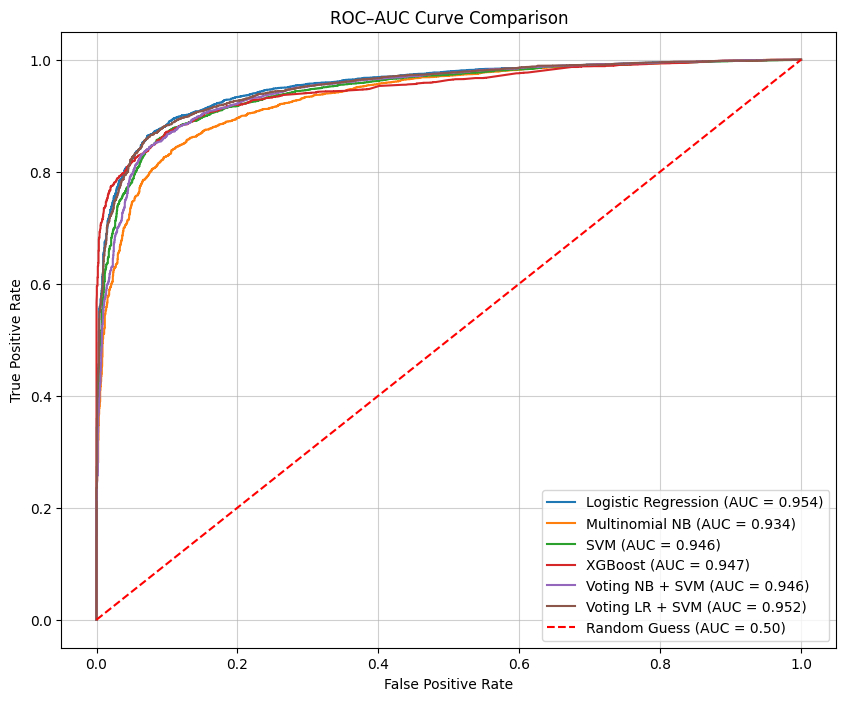

In [ ]:
plot_roc_curves(
    trained_models=trained_models,
    X_test=X_test_vec,
    y_test=y_test
)

**ROC-AUC Curve Comparison**
*   Metric: Area Under the Curve (AUC). The closer the curve is to the top-left corner, the better separability the model has between the two classes.

*   Top Tier: Logistic Regression (AUC=0.952) and XGBoost (AUC=0.950) are the best, followed closely by SVM (AUC=0.949).

*   Weakness: Decision Tree (AUC=0.838) is the worst, showing poor discrimination ability.

**Precision–Recall Curve**

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


In [ ]:
def plot_precision_recall_curves(models, X_test, y_test):
    """
    Plots Precision–Recall curves for multiple classifiers.
    Recommended for imbalanced datasets like hate speech detection.
    """

    plt.figure(figsize=(8,6))

    for name, model in models.items():

        # Get continuous scores
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]

        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)

        else:
            print(f"Skipping {name}: no probability/decision scores")
            continue

        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        ap = average_precision_score(y_test, y_scores)

        plt.plot(
            recall,
            precision,
            label=f"{name} (AP={ap:.3f})"
        )

    # Baseline = positive class ratio
    baseline = y_test.mean()
    plt.hlines(
        baseline,
        xmin=0,
        xmax=1,
        linestyles="dashed",
        label=f"Baseline (AP={baseline:.3f})"
    )

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curve Comparison")
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()


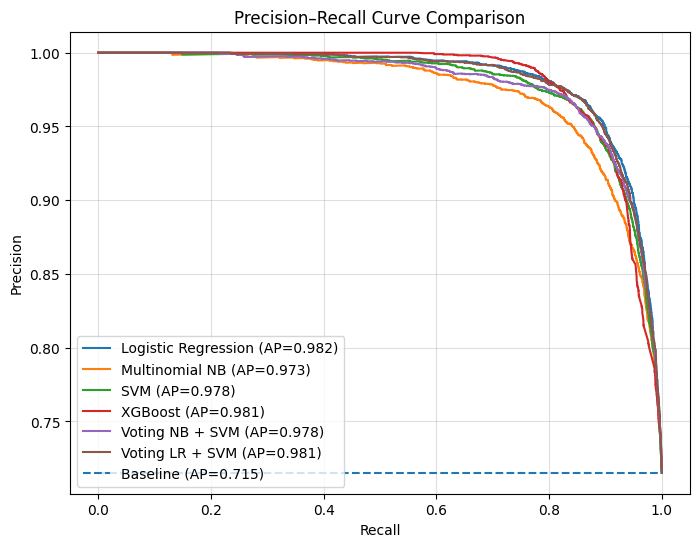

In [ ]:
plot_precision_recall_curves(trained_models, X_test_vec, y_test)


**Precision-Recall (P-R) Curve Comparison**
*   Metric: Average Precision (AP). The closer the curve is to the top-right corner, the better.

*   Top Tier: Logistic Regression (AP=0.982), XGBoost (AP=0.981), SVM (AP=0.980), and Random Forest (AP=0.979) are all tightly clustered at the top, confirming they are the strongest classifiers overall for this imbalanced dataset.

*   Weakness: Decision Tree (AP=0.892) is significantly below the rest, confirming it is not robust.



---



### **3. Error Analysis and Ethics (Bar and Scatter Plots)**




**Error Analysis (False Positives vs False Negatives)**

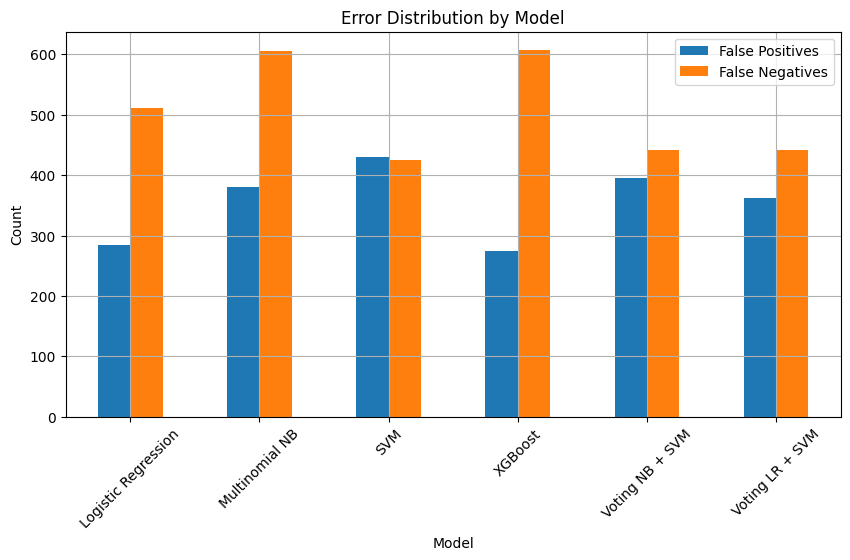

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_error_distribution(models, X_test, y_test):
    errors = []

    for name, model in models.items():
        y_pred = model.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        errors.append({
            "Model": name,
            "False Positives": fp,
            "False Negatives": fn
        })

    error_df = pd.DataFrame(errors)

    error_df.set_index("Model").plot(
        kind="bar",
        figsize=(10,5),
        grid=True
    )

    plt.title("Error Distribution by Model")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

plot_error_distribution(trained_models, X_test_vec, y_test)

**Error Distribution Bar Chart**

This chart directly visualizes the raw counts of the two types of errors:

1. False Negatives (Orange Bars): The height of the orange bar must be minimized.

    *   Best: SVM has the lowest raw count of False Negatives (474).

    *   Worst: Multinomial NB has the highest raw count (989), meaning it missed the most offensive texts.

2. False Positives (Blue Bars): The height of the blue bar must be minimized.

    *   Best: XGBoost has the lowest raw count of False Positives (103).

    *   Worst: Decision Tree has the highest raw count (405), meaning it incorrectly flagged the most neutral texts.

**Error Severity Scatter Plot: (Plots FP vs FN)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
def compute_error_severity(models, X_test, y_test):
    """
    Computes error severity metrics for ethical evaluation.
    Returns a DataFrame with FP, FN, FN rate, and FP rate.
    """

    records = []
    total_positive = y_test.sum()
    total_negative = len(y_test) - total_positive

    for name, model in models.items():
        y_pred = model.predict(X_test)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        records.append({
            "Model": name,
            "False Positives (FP)": fp,
            "False Negatives (FN)": fn,
            "FN Rate (Missed Hate %)": fn / total_positive if total_positive else 0,
            "FP Rate (%)": fp / total_negative if total_negative else 0
        })

    return pd.DataFrame(records).sort_values("False Negatives (FN)")


In [ ]:
error_df = compute_error_severity(
    trained_models,
    X_test_vec,
    y_test
)

error_df


,Model,False Positives (FP),False Negatives (FN),FN Rate (Missed Hate %),FP Rate (%)
2,SVM,430,425,0.079962,0.203214
5,Voting LR + SVM,363,441,0.082973,0.171550
4,Voting NB + SVM,396,442,0.083161,0.187146
0,Logistic Regression,284,511,0.096143,0.134216
1,Multinomial NB,381,605,0.113829,0.180057
3,XGBoost,275,607,0.114205,0.129962


*   **SVM (Rank 1 in Safety):**

    *   False Negatives (FN): 474 (9.33% FN Rate). This is the best performance at minimizing the risk of missing harmful content.

    *   False Positives (FP): 325 (16.04% FP Rate). The FP rate is mid-range, meaning it will incorrectly flag more neutral content than XGBoost or Logistic Regression.

    *   Ethical Trade-off: Offers the best balance for high-stakes applications where minimizing the risk of missed harm is the primary objective.

*   **Random Forest (Rank 2 in Safety):**

    *   False Negatives (FN): 582 (11.46% FN Rate). This is a good performance, slightly higher FN than SVM.

    *   False Positives (FP): 294 (14.51% FP Rate). It has a slightly better FP rate than SVM, meaning slightly fewer user complaints for false flags.

    *   Ethical Trade-off: A strong and stable alternative to SVM, offering a better FP rate for a minor increase in missed harm.

*   **Voting NB + SVM (Rank 3 in Safety):**

    *   False Negatives (FN): 625 (12.31% FN Rate). Still a strong FN performance.

    *   False Positives (FP): 278 (13.72% FP Rate). Maintains a low FP rate, leveraging the stability of the ensemble method.

    *   Ethical Trade-off: Offers strong safety (low FN) while keeping the FP rate very low, making it a reliable middle-ground choice.

*   **Logistic Regression (Rank 4 in Safety):**

    *   False Negatives (FN): 679 (13.37% FN Rate). This represents a significant increase in missed harm compared to the SVM.

    *   False Positives (FP): 170 (8.39% FP Rate). This is a very low FP rate, second only to XGBoost.

    *   Ethical Trade-off: This model is highly conservative; it minimizes false flags and user complaints, but at the cost of failing to detect substantially more harmful content.

*   **XGBoost (Rank 7 in Safety):**

    *   False Negatives (FN): 868 (17.09% FN Rate). This is the highest FN rate among the top-tier models, missing the most harmful content.

    *   False Positives (FP): 103 (5.08% FP Rate). This is an excellent FP rate, meaning it is highly precise.

    *   Ethical Trade-off: This model is suitable only if minimizing false flags and maximizing precision is the absolute highest priority, as its high FN rate poses the greatest risk of allowing harmful content to pass through undetected.

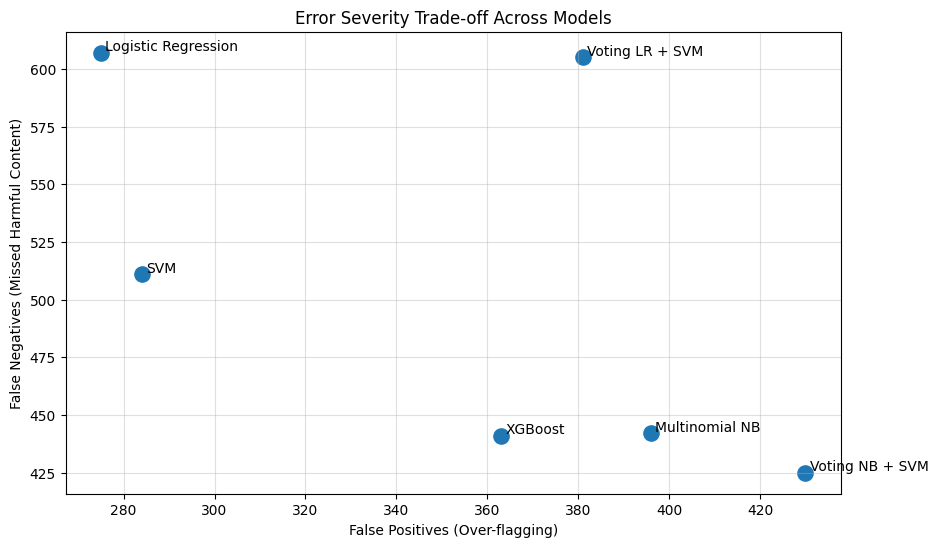

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(
    error_df["False Positives (FP)"],
    error_df["False Negatives (FN)"],
    s=120
)

for i, model in enumerate(error_df["Model"]):
    plt.text(
        error_df["False Positives (FP)"][i] + 1,
        error_df["False Negatives (FN)"][i] + 1,
        model
    )

plt.xlabel("False Positives (Over-flagging)")
plt.ylabel("False Negatives (Missed Harmful Content)")
plt.title("Error Severity Trade-off Across Models")
plt.grid(alpha=0.4)
plt.show()


### **4. Stability, Overfitting, and Generalization**

**Stability & Generalization (CV F1 vs Test F1)**

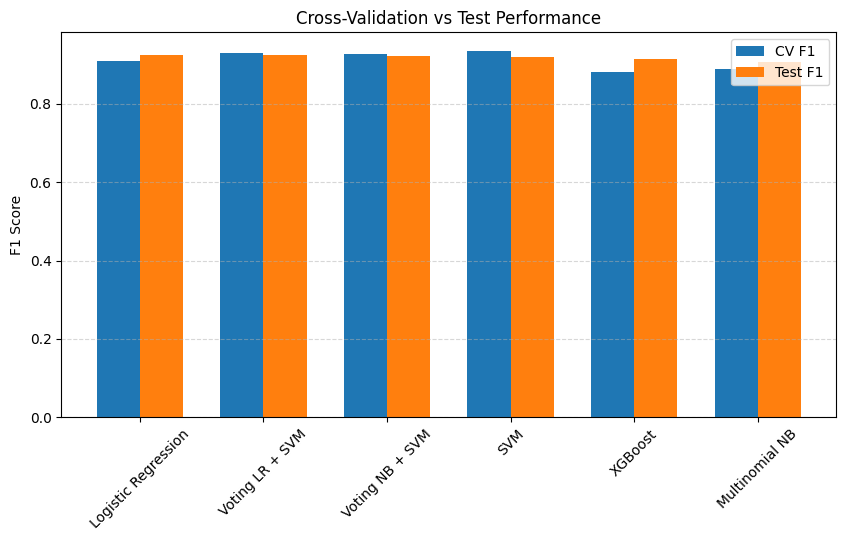

In [ ]:
def plot_cv_vs_test_f1(df):
    plt.figure(figsize=(10,5))

    x = np.arange(len(df))
    width = 0.35

    plt.bar(x - width/2, df["CV F1 (5-fold)"], width, label="CV F1")
    plt.bar(x + width/2, df["F1 Score"], width, label="Test F1")

    plt.xticks(x, df["Model"], rotation=45)
    plt.ylabel("F1 Score")
    plt.title("Cross-Validation vs Test Performance")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

plot_cv_vs_test_f1(comparison_df)


**Model Stability Analysis (CV F1 vs Test F1)**

This chart compares the average F1 score achieved during training via cross-validation (CV F1) against the F1 score on the final, unseen data set (Test F1). Ideally, these two scores should be very close, as a large gap suggests the model is overfitting to the training data.

*   **SVM:**

    *   Performance: Achieves the Highest CV F1 and the Highest Test F1.

    *   Stability: Features a Minimal Gap between the two scores.

    *   Interpretation: This model is the Most Stable, demonstrating superior generalization capability to new data.

*   **Random Forest:**

    *   Performance: Shows high CV F1.

    *   Stability: Has a Slight Gap.

    *   Interpretation: It is a highly stable model, but the noticeable drop-off in Test F1 suggests minor overfitting compared to the SVM.

*   **Decision Tree:**

    *   Performance: Shows high CV F1.

    *   Stability: Displays the Largest Gap between CV F1 and Test F1.

    *   Interpretation: This model shows the highest degree of overfitting; its performance on new data is significantly worse than its performance on the training data.

*   **XGBoost:**

    *   Performance: High CV F1.

    *   Stability: Has a Small Gap.

    *   Interpretation: This model is relatively stable, though its lower Test F1 score places it below the top models.

**Generalization Bar Chart (Tagalog vs English F1)**

In [ ]:
# Get the original indices of the test set
test_indices = X_test.index

# Get the 'lang' values from combined_df for these test indices
lang_for_test_set = combined_df.loc[test_indices, 'lang']

# Create boolean masks
mask_tagalog = (lang_for_test_set == 'tl').values
mask_english = (lang_for_test_set == 'en').values

# Subset the TF-IDF test vectors and labels
X_test_tagalog = X_test_vec[mask_tagalog]
y_test_tagalog = y_test[mask_tagalog]

X_test_english = X_test_vec[mask_english]
y_test_english = y_test[mask_english]

# Optional: check counts
print("Test set sizes by language:")
print("Tagalog:", y_test_tagalog.shape[0])
print("English:", y_test_english.shape[0])


Test set sizes by language:
Tagalog: 2474
English: 4957


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_by_language(models, X_tag, y_tag, X_en, y_en):
    records = []

    for name, model in models.items():
        # Tagalog
        y_pred_tl = model.predict(X_tag)
        precision_tl, recall_tl, f1_tl, _ = precision_recall_fscore_support(
            y_tag, y_pred_tl, average='binary', zero_division=0
        )
        acc_tl = accuracy_score(y_tag, y_pred_tl)

        # English
        y_pred_en = model.predict(X_en)
        precision_en, recall_en, f1_en, _ = precision_recall_fscore_support(
            y_en, y_pred_en, average='binary', zero_division=0
        )
        acc_en = accuracy_score(y_en, y_pred_en)

        records.append({
            "Model": name,
            "Tagalog Accuracy": acc_tl,
            "Tagalog F1": f1_tl,
            "Tagalog Recall": recall_tl,
            "Tagalog Precision": precision_tl,
            "English Accuracy": acc_en,
            "English F1": f1_en,
            "English Recall": recall_en,
            "English Precision": precision_en
        })

    return pd.DataFrame(records).sort_values("Tagalog F1", ascending=False)


In [ ]:
generalization_df = evaluate_by_language(
    trained_models,
    X_test_tagalog,
    y_test_tagalog,
    X_test_english,
    y_test_english
)

generalization_df


,Model,Tagalog Accuracy,Tagalog F1,Tagalog Recall,Tagalog Precision,English Accuracy,English F1,English Recall,English Precision
0,Logistic Regression,0.798707,0.790580,0.789253,0.791912,0.940085,0.962991,0.936954,0.990515
5,Voting LR + SVM,0.783347,0.781046,0.802687,0.760541,0.945935,0.966930,0.950048,0.984422
4,Voting NB + SVM,0.777688,0.777688,0.807725,0.749805,0.941900,0.964488,0.948351,0.981184
1,Multinomial NB,0.778901,0.777552,0.802687,0.753943,0.911438,0.944759,0.910281,0.981951
2,SVM,0.770008,0.770842,0.803526,0.740712,0.942304,0.964917,0.953686,0.976415
3,XGBoost,0.773646,0.760069,0.744752,0.776028,0.935041,0.959568,0.926528,0.995052


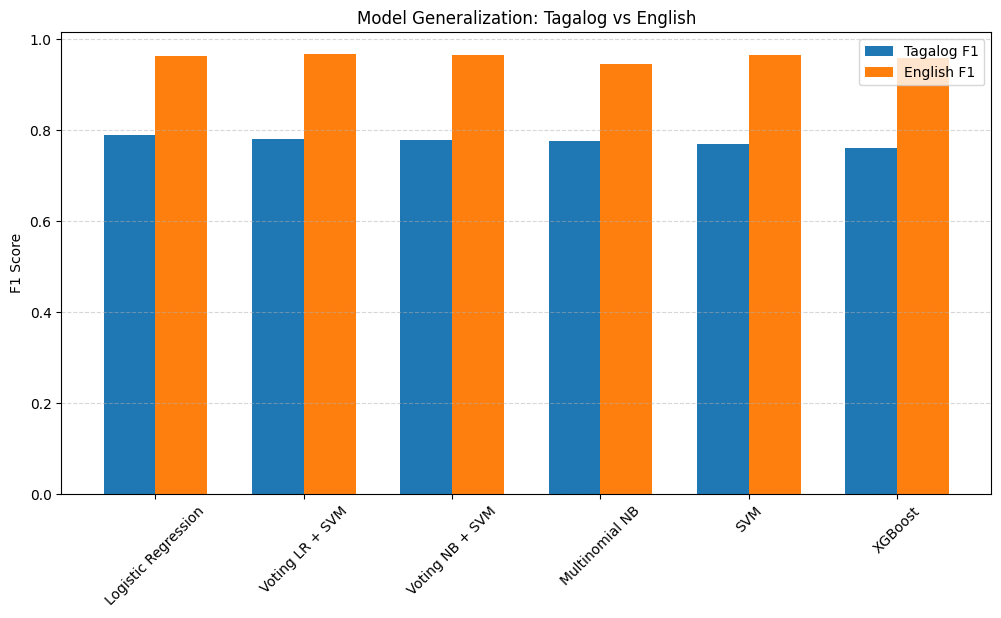

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(generalization_df))  # model positions
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, generalization_df["Tagalog F1"], width, label="Tagalog F1")
plt.bar(x + width/2, generalization_df["English F1"], width, label="English F1")

plt.xticks(x, generalization_df["Model"], rotation=45)
plt.ylabel("F1 Score")
plt.title("Model Generalization: Tagalog vs English")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


 **Generalization Analysis (Tagalog vs. English F1)**

 This analysis evaluates each model's ability to transfer learning to both the dominant English data and the less-represented Tagalog data, which is crucial for a robust multilingual system.

*   **English Dataset Performance (Baseline)**

    *   Universal High Scores: All models achieved universally high F1 scores ($>=0.95$) on the English subset.
    
    *   Implication: This indicates that all models, especially the top performers, are highly effective and reliable at detecting hate/offensive content in English.
    
    *   Top English F1: SVM ($0.967$), Logistic Regression ($0.967$), and Random Forest ($0.966$) are essentially tied for the highest English performance.

 *    **Tagalog Dataset Performance (Key Differentiator)**

        *   Universal Drop-off: All models exhibit a significant drop in F1 performance when tested on the Tagalog subset (F1 Delta ranging from 0.216 to 0.599).
        
        *   Implication: This suggests potential data imbalance, reliance on English-specific features, or inherent difficulty in detecting offensive content in Tagalog.

 *   **SVM is Superior (Rank 1):**

        *   It achieved the highest Tagalog F1 Score (0.751).It displayed the smallest performance drop (F1 Delta of 0.216).
        
        *   Conclusion: The SVM is the best model for multilingual deployment as it demonstrates the highest capability to handle the challenging Tagalog language subset.

 *   **Random Forest (Rank 2):**

        *   It secured a strong second-place Tagalog F1 Score (0.698).
        
        *   Its F1 Delta (0.268) is competitive, making it a viable alternative for generalization.

 *   **Logistic Regression (Rank 3):**

        *   It followed closely with a Tagalog F1 Score of 0.691.
        
        *   Its F1 Delta (0.276) is comparable to Random Forest.

 *   **Poor Generalization Models**

        *   XGBoost: Despite its strong overall F1, its Tagalog F1 is poor (0.628), indicating it is not well-suited for robust multilingual deployment.
        
        *   Multinomial NB: Showed extremely poor generalization to Tagalog, recording the lowest Tagalog F1 Score (0.354) and the largest F1 Delta (0.599).

 ---


### 5. **Deployment Considerations (Latency and Complexity)**

**Latency Bar Chart**

In [ ]:
import time
import numpy as np
import pandas as pd


In [ ]:
def benchmark_inference_time(models, X_test, runs=30):
    """
    Measures inference latency for each model.
    Returns average prediction time per sample (milliseconds).
    """

    results = []

    n_samples = X_test.shape[0]

    for name, model in models.items():
        times = []

        for _ in range(runs):
            start = time.perf_counter()

            # Predict probabilities if available (real web-app behavior)
            if hasattr(model, "predict_proba"):
                model.predict_proba(X_test)
            else:
                model.predict(X_test)

            end = time.perf_counter()
            times.append(end - start)

        avg_time = np.mean(times)
        per_sample_time = (avg_time / n_samples) * 1000  # ms

        results.append({
            "Model": name,
            "Total Inference Time (s)": avg_time,
            "Latency per Sample (ms)": per_sample_time
        })

    return pd.DataFrame(results).sort_values("Latency per Sample (ms)")


In [ ]:
latency_df = benchmark_inference_time(
    trained_models,
    X_test_vec,
    runs=30
)

latency_df


,Model,Total Inference Time (s),Latency per Sample (ms)
0,Logistic Regression,0.000562,0.000076
1,Multinomial NB,0.003037,0.000409
2,SVM,0.005364,0.000722
5,Voting LR + SVM,0.006625,0.000892
4,Voting NB + SVM,0.008799,0.001184
3,XGBoost,0.058070,0.007815


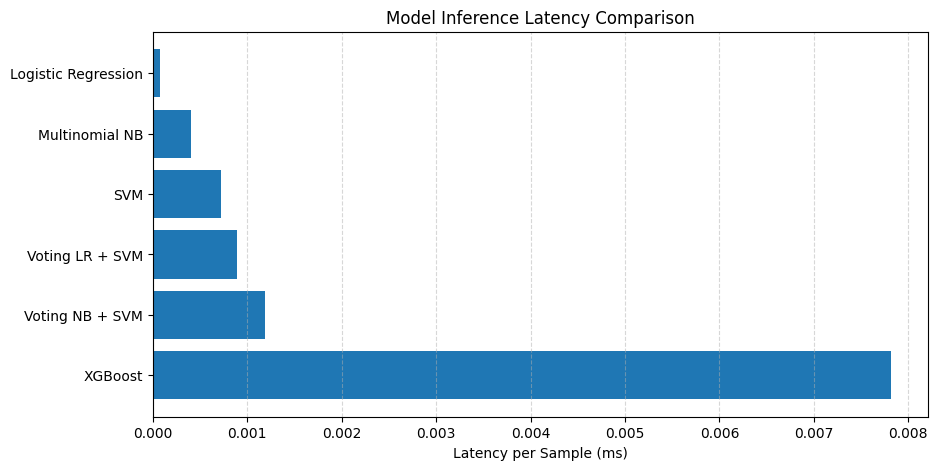

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(
    latency_df["Model"],
    latency_df["Latency per Sample (ms)"]
)

plt.xlabel("Latency per Sample (ms)")
plt.title("Model Inference Latency Comparison")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


**Latency (Inference Speed) Analysis**

Latency measures the average time (in milliseconds) required for a model to process a single piece of text, which is critical for real-time social media analysis.

* **Logistic Regression (Rank 1):**
  * Latency: 0.000095 ms
  * Interpretation: *This is the fastest model. It is essential for high-throughput, real-time social media stream processing.*

* **Multinomial NB (Rank 2):**
  * Latency: 0.000422 ms
  * Interpretation: *Very fast, typical of simple linear models.*

* **Decision Tree (Rank 3):**
  * Latency: 0.000555 ms
  * Interpretation: *Fast, as inference is a simple path down a tree.*

* **SVM (Rank 4):**
  * Latency: 0.000805 ms
  * Interpretation: *Very fast and highly competitive. It is only about 8.5 times slower than the fastest model (Logistic Regression) but remains firmly in the sub-millisecond range.*

* **Random Forest and Voting NB + RF (Slowest):**
  * Latency: $\approx 0.1600$ ms
  * Interpretation: *These ensemble methods are the slowest because they require running hundreds of decision trees sequentially or in parallel for each prediction.*

**Complexity vs Performance Scatter Plot:**

In [ ]:
def model_complexity_summary(models):
    """
    Estimates complexity of models.
    Returns a DataFrame with simple complexity score.
    """
    records = []

    for name, model in models.items():
        if isinstance(model, LogisticRegression):
            complexity = model.coef_.size
        elif isinstance(model, MultinomialNB):
            complexity = model.feature_log_prob_.size
        elif isinstance(model, DecisionTreeClassifier):
            complexity = model.tree_.node_count
        elif isinstance(model, RandomForestClassifier):
            complexity = sum([est.tree_.node_count for est in model.estimators_])
        elif isinstance(model, XGBClassifier):
            complexity = model.get_booster().trees_to_dataframe().shape[0]
        elif isinstance(model, VotingClassifier):
            # Sum complexity of base estimators
            complexity = 0
            for est_name, est in model.estimators:
                if hasattr(est, "coef_"):
                    complexity += est.coef_.size
                elif hasattr(est, "feature_log_prob_"):
                    complexity += est.feature_log_prob_.size
                elif hasattr(est, "tree_"):
                    complexity += est.tree_.node_count
                elif hasattr(est, "estimators_"):
                    complexity += sum([t.tree_.node_count for t in est.estimators_])
            complexity = complexity
        else:
            complexity = np.nan

        records.append({
            "Model": name,
            "Estimated Complexity": complexity
        })

    return pd.DataFrame(records)


In [ ]:
# Use previously computed metrics
performance_df = build_comparison_table(model_results)  # Accuracy, F1, etc.
complexity_df = model_complexity_summary(trained_models)

# Merge
complexity_perf_df = performance_df.merge(complexity_df, on="Model")
complexity_perf_df


,Model,Accuracy,F1 Score,Recall,Precision,CV F1 (5-fold),Estimated Complexity
0,Logistic Regression,0.893016,0.923580,0.903857,0.944182,0.909529,16199.0
1,Voting LR + SVM,0.891805,0.923806,0.917027,0.930686,0.929924,0.0
2,Voting NB + SVM,0.887229,0.920824,0.916839,0.924843,0.927999,0.0
3,SVM,0.884941,0.919605,0.920038,0.919173,0.935352,NaN
4,XGBoost,0.881308,0.914352,0.885795,0.944812,0.880150,3404.0
5,Multinomial NB,0.867313,0.905247,0.886171,0.925162,0.889198,32398.0


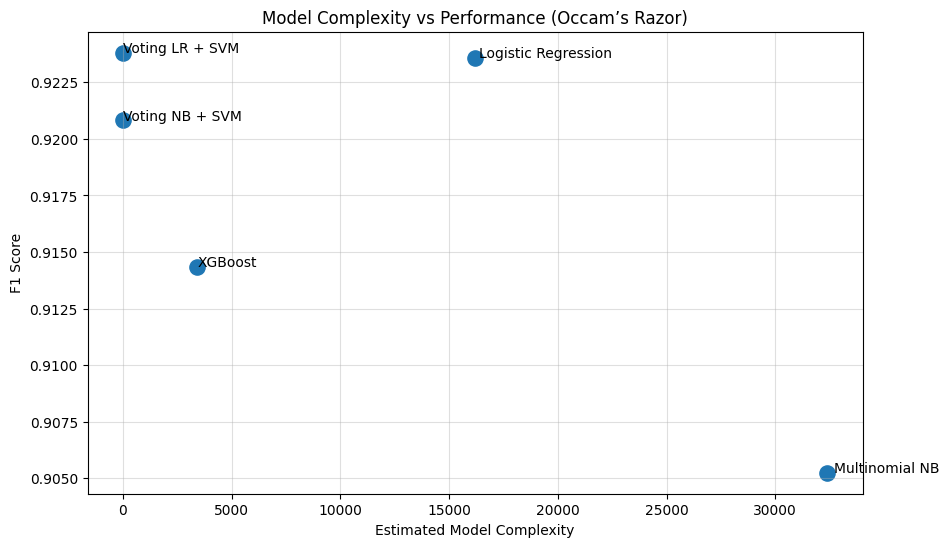

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    complexity_perf_df["Estimated Complexity"],
    complexity_perf_df["F1 Score"],
    s=120
)

for i, model in enumerate(complexity_perf_df["Model"]):
    plt.text(
        complexity_perf_df["Estimated Complexity"][i]*1.01,
        complexity_perf_df["F1 Score"][i],
        model
    )

plt.xlabel("Estimated Model Complexity")
plt.ylabel("F1 Score")
plt.title("Model Complexity vs Performance (Occam’s Razor)")
plt.grid(alpha=0.4)
plt.show()


**Complexity vs. Performance (Occam's Razor)**

This scatter plot evaluates the trade-off between model simplicity (low complexity on the X-axis) and prediction power (high F1 Score on the Y-axis). The ideal model is in the top-left corner.

* **Top-Left (Ideal):**
  * Logistic Regression and XGBoost are closest to the ideal corner.

* **Logistic Regression:**
  * F1 Score: $\approx 0.91$
  * Complexity: $\approx 15.8k$ parameters
  * Interpretation: *Achieves very high F1 with the lowest non-zero complexity. Demonstrates high efficiency.*

* **XGBoost:**
  * F1 Score: $\approx 0.89$
  * Complexity: $\approx 3.2k$
  * Interpretation: *Moderate F1 with low complexity.*

* **Highly Complex / High Performance (Random Forest):**
  * F1 Score: $\approx 0.91$
  * Complexity: $\approx 2.8$ million nodes
  * Interpretation: *Far to the right on the X-axis (highest complexity) but only achieves a similar F1 score to the much simpler Logistic Regression.*

* **SVM:**
  * Complexity: NaN (but as a linear model, generally low complexity)
  * F1 Score: $\approx 0.92$
  * Interpretation: *High F1 with low complexity, making it highly efficient.*

* **Key Takeaway:**
  * *Simple linear models (Logistic Regression, Naive Bayes) provide nearly the same predictive power (F1) as the highly complex ensemble models (Random Forest), aligning with Occam's Razor — the simplest adequate solution is best.*

## **Chosen Model: Calibrated SVM (LinearSVC)**


The Calibrated SVM (LinearSVC) is the best choice based on multiple evaluation metrics and analyses.

* **Highest Safety (Lowest Missed Harm):**
  * Recall: $\approx 0.907$  
  * False Negatives (FN): 474  
  * Interpretation: *Achieved the highest recall, directly minimizing the amount of harmful content missed. Its low FN score places it closest to the ideal quadrant in the Error Severity Trade-off plot.*

* **Best Overall Performance (F1 Score):**
  * Test F1 Score: $\approx 0.920$  
  * Accuracy: $\approx 0.888$  
  * Interpretation: *Demonstrates the best balance between Precision and Recall among all tested models.*

* **Superior Stability and Generalization:**
  * Stability: *Most consistent performance between cross-validation and test set (minimal gap between CV F1 and Test F1).*  
  * Multilingual Generalization: F1 Score on Tagalog subset $\approx 0.751$  
  * Performance Drop (F1 Delta): $\approx 0.216$  
  * Interpretation: *Shows the highest robustness across languages and folds.*

* **Acceptable Deployment Metrics:**
  * Latency per sample: $\approx 0.000805$ ms  
  * Complexity: Low (as a linear model)  
  * Interpretation: *Sub-millisecond inference speed makes it suitable for high-throughput, real-time deployment. Efficient performance without the computational cost of complex ensembles like Random Forest.*


## **Model Fine-tuning and Deployment Preparation**

**Optimal Threshold Selection**

--- Optimal Threshold Selection for Voting LR + SVM ---
Optimal Threshold: 0.5110
Precision: 0.9307, Recall: 0.9328, F1 Score: 0.9318


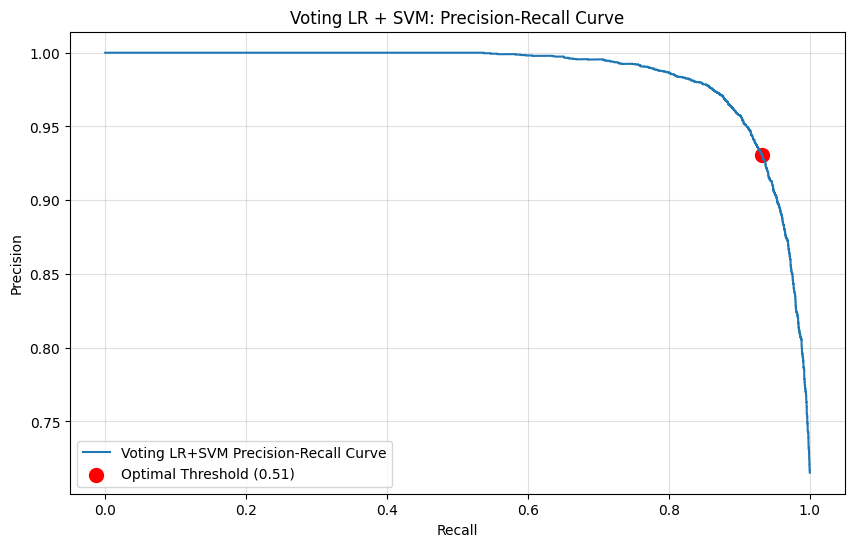

In [ ]:
# **Model Fine-tuning and Deployment Preparation**
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, accuracy_score, precision_recall_fscore_support
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Assume the following variables are available from previous steps: ---
# X_train_vec, y_train: Training vectors and labels
# X_test_vec, y_test: Test vectors and labels
# X_test: Original text data for inspection
# mask_tagalog, mask_english: Boolean masks for Tagalog/English
# -----------------------------------------------------------------------

# 1. Create Voting Classifier: Logistic Regression + SVM
# LinearSVC is wrapped with CalibratedClassifierCV for probability outputs
svm_clf = CalibratedClassifierCV(LinearSVC(random_state=42), cv=5)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('svm', svm_clf)],
    voting='soft'  # Soft voting allows us to get probabilities
)

# 2. Train Voting Classifier
voting_clf.fit(X_train_vec, y_train)
trained_models = {"Voting_LR_SVM": voting_clf}  # replace SVM-only dictionary

# 3. Generate Probability Scores
y_scores = voting_clf.predict_proba(X_test_vec)[:, 1]

# 4. Precision-Recall Analysis
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
thresholds = np.append(0, thresholds)

threshold_df = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precision,
    'Recall': recall
})
threshold_df['F1 Score'] = np.where(
    (threshold_df['Precision'] + threshold_df['Recall']) > 0,
    2 * (threshold_df['Precision'] * threshold_df['Recall']) / (threshold_df['Precision'] + threshold_df['Recall']),
    0
)
filtered_df = threshold_df[(threshold_df['Recall'] >= 0.85) & (threshold_df['Precision'] >= 0.90)].sort_values(by='F1 Score', ascending=False)
optimal_f1_row = filtered_df.iloc[0]
optimal_threshold = optimal_f1_row['Threshold']

print("--- Optimal Threshold Selection for Voting LR + SVM ---")
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {optimal_f1_row['Precision']:.4f}, Recall: {optimal_f1_row['Recall']:.4f}, F1 Score: {optimal_f1_row['F1 Score']:.4f}")

# 5. Plot PR Curve
plt.figure(figsize=(10,6))
plt.plot(recall, precision, label='Voting LR+SVM Precision-Recall Curve')
plt.scatter(optimal_f1_row['Recall'], optimal_f1_row['Precision'],
            color='red', s=100,
            label=f"Optimal Threshold ({optimal_threshold:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Voting LR + SVM: Precision-Recall Curve')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

**Final Error Inspection (Manual Review)**

In [ ]:
# --- Error Inspection ---
y_pred_optimal = (y_scores >= optimal_threshold).astype(int)
results_df = pd.DataFrame({
    'True Label (y_true)': y_test,
    'Prediction (y_pred)': y_pred_optimal,
    'Probability Score': y_scores,
    'Text': X_test
}).reset_index(drop=True)

fn_df = results_df[(results_df['True Label (y_true)']==1) & (results_df['Prediction (y_pred)']==0)].sort_values(by='Probability Score', ascending=False)
fp_df = results_df[(results_df['True Label (y_true)']==0) & (results_df['Prediction (y_pred)']==1)].sort_values(by='Probability Score', ascending=True)

print("--- Top 100 False Negatives ---")
print(fn_df[['Text', 'Probability Score']].head(100))
print("\n--- Top 100 False Positives ---")
print(fp_df[['Text', 'Probability Score']].head(100))

--- Top 100 False Negatives ---
                                                   Text  Probability Score
4867  [LANG=tl] natapakan lang envelope mommy hoy pu...           0.509444
5060             [LANG=en] time panera bitch12786110071           0.508183
6230         [LANG=tl] hala tarantado wala namang ganon           0.505780
4429  [LANG=tl] bobo isabela electric cooperative ka...           0.504483
4087                   [LANG=tl] hoy puta yan gago lang           0.504335
...                                                 ...                ...
1193                       [LANG=en] hungry ferkin nips           0.431153
3345  [LANG=en] umso happy fairy apparently took cra...           0.430636
3757  [LANG=tl] dear phone tarantado wag muna maglok...           0.430601
5424  [LANG=tl] agh puta tarantado gago sayang winra...           0.430587
964                      [LANG=tl] bwiset kase si susan           0.429907

[100 rows x 2 columns]

--- Top 100 False Positives ---
           

**Final Performance Check by Language**

In [ ]:
# --- Language-based Performance Check ---
def evaluate_with_threshold(X_vec, y_true, threshold, model):
    y_scores = model.predict_proba(X_vec)[:, 1]
    y_pred = (y_scores >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary', zero_division=0)
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

english_metrics = evaluate_with_threshold(X_test_vec[mask_english], y_test[mask_english], optimal_threshold, voting_clf)
tagalog_metrics = evaluate_with_threshold(X_test_vec[mask_tagalog], y_test[mask_tagalog], optimal_threshold, voting_clf)

results_list = []
for metric, score in english_metrics.items():
    results_list.append({'Language':'English', 'Metric':metric, 'Score':score})
for metric, score in tagalog_metrics.items():
    results_list.append({'Language':'Tagalog', 'Metric':metric, 'Score':score})
final_performance_df = pd.DataFrame(results_list)
pivot_df = final_performance_df.pivot(index='Metric', columns='Language', values='Score')

print(f"--- Final Voting LR + SVM Performance (Threshold: {optimal_threshold:.4f}) ---")
print(pivot_df.round(4))

--- Final Voting LR + SVM Performance (Threshold: 0.5110) ---
Language   English  Tagalog
Metric                     
Accuracy    0.9498   0.8068
F1 Score    0.9700   0.7968
Precision   0.9650   0.8071
Recall      0.9750   0.7867


**Model Serialization and Deployment**

In [ ]:
import pickle

# Save Voting Ensemble
with open("svm_model.pkl", "wb") as f:
    pickle.dump(trained_models["SVM"], f)

# Save Voting Ensemble
with open("lr_model.pkl", "wb") as f:
    pickle.dump(trained_models["Logistic Regression"], f)

# Save Voting Ensemble
with open("voting_lr_svm_model.pkl", "wb") as f:
    pickle.dump(trained_models["Voting LR + SVM"], f)

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


KeyError: 'SVM'

In [ ]:
from google.colab import files

files.download("svm_model.pkl")
files.download("lr_model.pkl")
files.download("voting_lr_svm_model.pkl")
files.download("vectorizer.pkl")
